# Full Model

### Data Loading from Pickle into DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import kurtosis
from scipy.stats import skew

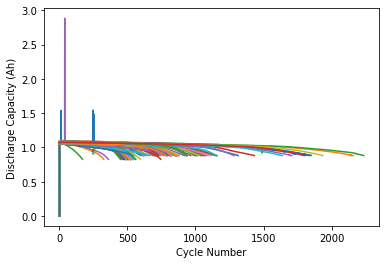

In [2]:
#LoadBatch
batch1 = pickle.load(open(r'C:\Users\satsin\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']
numBat1 = len(batch1.keys())
batch2 = pickle.load(open(r'C:\Users\satsin\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
batch3 = pickle.load(open(r'C:\Users\satsin\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

#Batch_1 = pd.DataFrame(data=batch1)
#Batch_1.to_excel('summary1.xlsx')
#Batch_2 = pd.DataFrame(data=batch2)
#Batch_2.to_excel('summary2.xlsx')
#Batch_3 = pd.DataFrame(data=batch3)
#Batch_3.to_excel('summary3.xlsx')

test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [3]:
df = pd.DataFrame(bat_dict)

In [4]:
df.head()

b1c0  \
cycle_life                                            [[1852.0]]   
charge_policy                                     3.6C(80%)-3.6C   
summary        {'IR': [0.0, 0.016742354, 0.016724309, 0.01668...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c1  \
cycle_life                                            [[2160.0]]   
charge_policy                                     3.6C(80%)-3.6C   
summary        {'IR': [0.0, 0.017038831, 0.017009802, 0.01692...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c2  \
cycle_life                                            [[2237.0]]   
charge_policy                                     3.6C(80%)-3.6C   
summary        {'IR': [0.0, 0.01686798, 0.016831938, 0.016718...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c3  \
cycle_life                                            [[1434.0]]   
charge_policy                                         4C(80%)-4C   
summary        {'IR': [0.0, 0.016369704, 0.016315572, 0.01632...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c4  \
cycle_life                                            [[1709.0]]   
charge_policy                                         4C(80%)-4C   
summary        {'IR': [0.0, 0.016787428, 0.016740341, 0.01673...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c5  \
cycle_life                                            [[1074.0]]   
charge_policy                                     4.4C(80%)-4.4C   
summary        {'IR': [0.0, 0.016437579, 0.016396422, 0.01636...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c6  \
cycle_life                                             [[636.0]]   
charge_policy                                     4.8C(80%)-4.8C   
summary        {'IR': [0.0, 0.017001977, 0.016977131, 0.01693...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c7  \
cycle_life                                             [[870.0]]   
charge_policy                                     4.8C(80%)-4.8C   
summary        {'IR': [0.0, 0.016311171, 0.016267659, 0.01623...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c9  \
cycle_life                                            [[1054.0]]   
charge_policy                                     5.4C(40%)-3.6C   
summary        {'IR': [0.0, 0.016978227, 0.01692898, 0.016933...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                           b1c11  ...  \
cycle_life                                             [[788.0]]  ...   
charge_policy                                       5.4C(50%)-3C  ...   
summary        {'IR': [0.0, 0.016575078, 0.016582273, 0.01658...  ...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...  ...   

                                                           b3c33  \
cycle_life                                            [[1284.0]]   
charge_policy                            5C(67%)-4C-newstructure   
summary        {'IR': [0.015608473, 0.015511206, 0.015512635,...   
cycles         {'0': {'I': [0.4446896636363636, 0.74768759999...   

                                                           b3c34  \
cycle_life                                            [[1158.0]]   
charge_policy                          5.3C(54%)-4C-newstructure   
summary        {'IR': [0.01546871, 0.015438841, 0.015394062, ...   
cycles      

## Feature Creation and Selection

### Feature from Cycle Data: Variance,Mininum of 100th cycle -10th cycle  discharge 

In [5]:
#Feature creation from Cycle data
#Minimum,Variance,Skewness and kurtosis are the feature which needs to be created from cycle data for all the cycles
import math
var=[]
mini = []
skewness = []
kurt = []
Cycle=[]
cell_no =[]
for i in list(df):
    df1 = pd.DataFrame(df[i])
    df2 = df1.transpose()
    df3 = pd.DataFrame.from_dict({(j,k): df2['cycles'][j][k] 
                       for j in df2['cycles'].keys() 
                       for k in df2['cycles'][i].keys()},
                   orient='index')
    Qdlin = df3['Qdlin'][100]-df3['Qdlin'][10]
    Qdlin1 = pd.DataFrame(Qdlin)
    Qdlin1.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\\Qdlin1_1.csv')
    var.append('%.12f'%np.var(Qdlin1))
    mini.append('%.12f'%np.min(Qdlin1))
    cell_no.append(df2.index[0])
cell_no_1 = cell_no
var_1 = var
mini_1 = mini
Feature = pd.DataFrame(var_1,columns = ['Variance(Qdlin)'])
Feature['Minimum(Qdlin)']=mini_1
Feature['cell_no']=cell_no_1
Feature.head()

Variance(Qdlin)   Minimum(Qdlin) cell_no
0  0.000008881238  -0.008907145887    b1c0
1  0.000007315160  -0.009012600520    b1c1
2  0.000011171649  -0.010304001646    b1c2
3  0.000041082068  -0.019800614334    b1c3
4  0.000024843956  -0.014541302865    b1c4

### Feature from Summary Data: Intercept,Slope,Integral,IR and Qd for cycle 2 ,IR for 100 cycle and IR Difference of 100th and 2nd cycle

In [6]:
#Cycle 2 and Max of Qd extraction from summary data
from sklearn.linear_model import LinearRegression
from itertools import groupby
linreg =LinearRegression()
Intercept =[]
Slope=[]
Integral_1= []
Qd_cycle_2 = []

Mean_Chargetime =[]
IR_2 = []
IR_100 =[]
Diff_IR_100_2 = []
IR_min_1 =[]
for i in list(df):
    cell = pd.DataFrame(df[i])
    cell_1 = cell.transpose()
    df3 = pd.DataFrame(cell_1['summary'][i])
    Qd = df3['QD'][1:100]
    cycle= df3['cycle'][1:100]
    Qd_1 = Qd.values.reshape(-1,1)
    cycle_1 = cycle.values.reshape(-1,1)
    lin=linreg.fit(cycle_1,Qd_1)
    Intercept.append(lin.intercept_)
    Slope.append(lin.coef_)
    Integral=list(np.multiply(df3['Tavg'][1:100],df3['chargetime'][1:100]))
    Integral_1.append(np.sum(Integral))
    Qd_cycle_2.append(df3['QD'][1])
    Mean_Chargetime.append(np.mean(df3['chargetime'][0:4]))
    IR_2.append(df3['IR'][1])
    IR_100.append(df3['IR'][99])
    IR = list(df3['IR'][1:100])
#     IR_min.append(np.min(df3['IR'][1:100]))
    IR_min =[]
    for i in sorted(IR):
        if i!=0:
            IR_min.append(i)
    IR_min_1.append(np.min(IR_min))            

Intercept_1 = Intercept
Slope_1 = Slope
Integral_2 = Integral_1
Qd_cycle_2_1 = Qd_cycle_2
Mean_Chargetime_1 = Mean_Chargetime
IR_min_2 = IR_min_1
IR_2_1 = IR_2
IR_100_1 = IR_100
zip_object = zip(IR_100_1,IR_2_1)
for l1,l2 in zip_object:
    Diff_IR_100_2.append(l1-l2)
Diff_IR_100_2_1 = Diff_IR_100_2
Feature_1 = pd.DataFrame(Qd_cycle_2_1,columns = ['Qd_Cycle_2'])
Feature_1['Mean_Chargetime']=Mean_Chargetime_1
Feature_1['IR_min']=IR_min_2
Feature_1['Diff_IR_100_2']=Diff_IR_100_2_1
Feature_1['Integral']=Integral_2
Feature_1['Intercept']=Intercept_1
Feature_1['Slope']=Slope_1
# Feature_1['time']=time_1
Feature_1.head(10)

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
0    1.070689        10.048048  0.016444      -0.000075  41876.171150   
1    1.075301        10.048352  0.016764      -0.000042  41484.509937   
2    1.079922        10.027161  0.016613      -0.000014  41694.991899   
3    1.079723         9.006261  0.016098       0.000039  35729.237342   
4    1.078417         9.048335  0.016369      -0.000053  37527.249169   
5    1.076127         8.230217  0.015923      -0.000112  46090.122378   
6    1.075836         7.570377  0.016542      -0.000333  32094.376025   
7    1.093864         7.527433  0.016083      -0.000038  31809.844240   
8    1.082974         8.406008  0.016611      -0.000034  36328.258164   
9    1.053779         8.759990  0.015963      -0.000304  37893.500809   

              Intercept                        Slope  
0  [1.0911437324098123]  [[-0.00020680701298701336]]  
1  [1.0809645798796124]    [[5.535292517007068e-06]]  
2  [1.0848461200828694]   [[1.0295625231910925e-05]]  
3  [1.0840750159715524]   [[1.7136347557204543e-05]]  
4  [1.0818748211016282]   [[1.8994317872603454e-05]]  
5  [1.0797547949964956]   [[1.1228400742115004e-05]]  
6  [1.0811570258392085]   [[-4.808646876932587e-06]]  
7  [1.0972542699113585]   [[-6.428188002473641e-06]]  
8  [1.0867714248039577]   [[1.8204385899814535e-05]]  
9  [1.0589716063261183]    [[2.180940259740286e-05]]

In [7]:
Intercept =[]
for i in  Feature_1['Intercept']:
    Intercept.append(i[0])
Feature_1['Intercept_1']=Intercept

In [8]:
Slope =[]
for j in  Feature_1['Slope']:
    Slope.append(j[0][0])
Feature_1['Slope_1']=Slope
Feature_1.head()

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
0    1.070689        10.048048  0.016444      -0.000075  41876.171150   
1    1.075301        10.048352  0.016764      -0.000042  41484.509937   
2    1.079922        10.027161  0.016613      -0.000014  41694.991899   
3    1.079723         9.006261  0.016098       0.000039  35729.237342   
4    1.078417         9.048335  0.016369      -0.000053  37527.249169   

              Intercept                        Slope  Intercept_1   Slope_1  
0  [1.0911437324098123]  [[-0.00020680701298701336]]     1.091144 -0.000207  
1  [1.0809645798796124]    [[5.535292517007068e-06]]     1.080965  0.000006  
2  [1.0848461200828694]   [[1.0295625231910925e-05]]     1.084846  0.000010  
3  [1.0840750159715524]   [[1.7136347557204543e-05]]     1.084075  0.000017  
4  [1.0818748211016282]   [[1.8994317872603454e-05]]     1.081875  0.000019

In [9]:
Final_Feature = pd.concat([Feature, Feature_1], axis=1, join='inner')
Final_Feature.head()

Variance(Qdlin)   Minimum(Qdlin) cell_no  Qd_Cycle_2  Mean_Chargetime  \
0  0.000008881238  -0.008907145887    b1c0    1.070689        10.048048   
1  0.000007315160  -0.009012600520    b1c1    1.075301        10.048352   
2  0.000011171649  -0.010304001646    b1c2    1.079922        10.027161   
3  0.000041082068  -0.019800614334    b1c3    1.079723         9.006261   
4  0.000024843956  -0.014541302865    b1c4    1.078417         9.048335   

     IR_min  Diff_IR_100_2      Integral             Intercept  \
0  0.016444      -0.000075  41876.171150  [1.0911437324098123]   
1  0.016764      -0.000042  41484.509937  [1.0809645798796124]   
2  0.016613      -0.000014  41694.991899  [1.0848461200828694]   
3  0.016098       0.000039  35729.237342  [1.0840750159715524]   
4  0.016369      -0.000053  37527.249169  [1.0818748211016282]   

                         Slope  Intercept_1   Slope_1  
0  [[-0.00020680701298701336]]     1.091144 -0.000207  
1    [[5.535292517007068e-06]]     1.080965  0.000006  
2   [[1.0295625231910925e-05]]     1.084846  0.000010  
3   [[1.7136347557204543e-05]]     1.084075  0.000017  
4   [[1.8994317872603454e-05]]     1.081875  0.000019

### Target Variable : Cycle_life

In [10]:
cycle = []
for i in list(df):
    df2 = df.transpose()
    cycle.append(df2['cycle_life'][i][0][0])
Cycle_1 = cycle

In [11]:
Final_Feature['Cycle_life'] = pd.DataFrame(Cycle_1)

### Data Preprocessing

In [12]:
Final_Feature.head()

Variance(Qdlin)   Minimum(Qdlin) cell_no  Qd_Cycle_2  Mean_Chargetime  \
0  0.000008881238  -0.008907145887    b1c0    1.070689        10.048048   
1  0.000007315160  -0.009012600520    b1c1    1.075301        10.048352   
2  0.000011171649  -0.010304001646    b1c2    1.079922        10.027161   
3  0.000041082068  -0.019800614334    b1c3    1.079723         9.006261   
4  0.000024843956  -0.014541302865    b1c4    1.078417         9.048335   

     IR_min  Diff_IR_100_2      Integral             Intercept  \
0  0.016444      -0.000075  41876.171150  [1.0911437324098123]   
1  0.016764      -0.000042  41484.509937  [1.0809645798796124]   
2  0.016613      -0.000014  41694.991899  [1.0848461200828694]   
3  0.016098       0.000039  35729.237342  [1.0840750159715524]   
4  0.016369      -0.000053  37527.249169  [1.0818748211016282]   

                         Slope  Intercept_1   Slope_1  Cycle_life  
0  [[-0.00020680701298701336]]     1.091144 -0.000207      1852.0  
1    [[5.535292517007068e-06]]     1.080965  0.000006      2160.0  
2   [[1.0295625231910925e-05]]     1.084846  0.000010      2237.0  
3   [[1.7136347557204543e-05]]     1.084075  0.000017      1434.0  
4   [[1.8994317872603454e-05]]     1.081875  0.000019      1709.0

In [13]:
Final_Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variance(Qdlin)  124 non-null    object 
 1   Minimum(Qdlin)   124 non-null    object 
 2   cell_no          124 non-null    object 
 3   Qd_Cycle_2       124 non-null    float64
 4   Mean_Chargetime  124 non-null    float64
 5   IR_min           124 non-null    float64
 6   Diff_IR_100_2    124 non-null    float64
 7   Integral         124 non-null    float64
 8   Intercept        124 non-null    object 
 9   Slope            124 non-null    object 
 10  Intercept_1      124 non-null    float64
 11  Slope_1          124 non-null    float64
 12  Cycle_life       124 non-null    float64
dtypes: float64(8), object(5)
memory usage: 12.7+ KB


In [14]:
#Convert all object type to float
Final_Feature[["Variance(Qdlin)","Minimum(Qdlin)"]] = Final_Feature[["Variance(Qdlin)","Minimum(Qdlin)"]].apply(pd.to_numeric)

In [15]:
#Find the log10 of all the variables
Final_Feature['Log_Variance'] = np.log10(np.abs(Final_Feature['Variance(Qdlin)']))
Final_Feature['Log_Mininum'] = np.log10(np.abs(Final_Feature['Minimum(Qdlin)']))
Final_Feature['Log_Cycle_life'] = np.log10(np.abs(Final_Feature['Cycle_life']))

In [16]:
Final_Feature.head()

Variance(Qdlin)  Minimum(Qdlin) cell_no  Qd_Cycle_2  Mean_Chargetime  \
0         0.000009       -0.008907    b1c0    1.070689        10.048048   
1         0.000007       -0.009013    b1c1    1.075301        10.048352   
2         0.000011       -0.010304    b1c2    1.079922        10.027161   
3         0.000041       -0.019801    b1c3    1.079723         9.006261   
4         0.000025       -0.014541    b1c4    1.078417         9.048335   

     IR_min  Diff_IR_100_2      Integral             Intercept  \
0  0.016444      -0.000075  41876.171150  [1.0911437324098123]   
1  0.016764      -0.000042  41484.509937  [1.0809645798796124]   
2  0.016613      -0.000014  41694.991899  [1.0848461200828694]   
3  0.016098       0.000039  35729.237342  [1.0840750159715524]   
4  0.016369      -0.000053  37527.249169  [1.0818748211016282]   

                         Slope  Intercept_1   Slope_1  Cycle_life  \
0  [[-0.00020680701298701336]]     1.091144 -0.000207      1852.0   
1    [[5.535292517007068e-06]]     1.080965  0.000006      2160.0   
2   [[1.0295625231910925e-05]]     1.084846  0.000010      2237.0   
3   [[1.7136347557204543e-05]]     1.084075  0.000017      1434.0   
4   [[1.8994317872603454e-05]]     1.081875  0.000019      1709.0   

   Log_Variance  Log_Mininum  Log_Cycle_life  
0     -5.051526    -2.050261        3.267641  
1     -5.135776    -2.045150        3.334454  
2     -4.951883    -1.986994        3.349666  
3     -4.386348    -1.703321        3.156549  
4     -4.604779    -1.837397        3.232742

In [17]:
Final_Feature['batch'] =Final_Feature['cell_no'].str.extract('(.{2})')

In [18]:
Final_Feature.head()

Variance(Qdlin)  Minimum(Qdlin) cell_no  Qd_Cycle_2  Mean_Chargetime  \
0         0.000009       -0.008907    b1c0    1.070689        10.048048   
1         0.000007       -0.009013    b1c1    1.075301        10.048352   
2         0.000011       -0.010304    b1c2    1.079922        10.027161   
3         0.000041       -0.019801    b1c3    1.079723         9.006261   
4         0.000025       -0.014541    b1c4    1.078417         9.048335   

     IR_min  Diff_IR_100_2      Integral             Intercept  \
0  0.016444      -0.000075  41876.171150  [1.0911437324098123]   
1  0.016764      -0.000042  41484.509937  [1.0809645798796124]   
2  0.016613      -0.000014  41694.991899  [1.0848461200828694]   
3  0.016098       0.000039  35729.237342  [1.0840750159715524]   
4  0.016369      -0.000053  37527.249169  [1.0818748211016282]   

                         Slope  Intercept_1   Slope_1  Cycle_life  \
0  [[-0.00020680701298701336]]     1.091144 -0.000207      1852.0   
1    [[5.535292517007068e-06]]     1.080965  0.000006      2160.0   
2   [[1.0295625231910925e-05]]     1.084846  0.000010      2237.0   
3   [[1.7136347557204543e-05]]     1.084075  0.000017      1434.0   
4   [[1.8994317872603454e-05]]     1.081875  0.000019      1709.0   

   Log_Variance  Log_Mininum  Log_Cycle_life batch  
0     -5.051526    -2.050261        3.267641    b1  
1     -5.135776    -2.045150        3.334454    b1  
2     -4.951883    -1.986994        3.349666    b1  
3     -4.386348    -1.703321        3.156549    b1  
4     -4.604779    -1.837397        3.232742    b1

In [19]:
#Feature = Final_Feature.where(Final_Feature['batch']!='b3')
Final = Final_Feature.drop(['Intercept','Slope'],axis =1)

In [20]:
Final.head()

Variance(Qdlin)  Minimum(Qdlin) cell_no  Qd_Cycle_2  Mean_Chargetime  \
0         0.000009       -0.008907    b1c0    1.070689        10.048048   
1         0.000007       -0.009013    b1c1    1.075301        10.048352   
2         0.000011       -0.010304    b1c2    1.079922        10.027161   
3         0.000041       -0.019801    b1c3    1.079723         9.006261   
4         0.000025       -0.014541    b1c4    1.078417         9.048335   

     IR_min  Diff_IR_100_2      Integral  Intercept_1   Slope_1  Cycle_life  \
0  0.016444      -0.000075  41876.171150     1.091144 -0.000207      1852.0   
1  0.016764      -0.000042  41484.509937     1.080965  0.000006      2160.0   
2  0.016613      -0.000014  41694.991899     1.084846  0.000010      2237.0   
3  0.016098       0.000039  35729.237342     1.084075  0.000017      1434.0   
4  0.016369      -0.000053  37527.249169     1.081875  0.000019      1709.0   

   Log_Variance  Log_Mininum  Log_Cycle_life batch  
0     -5.051526    -2.050261        3.267641    b1  
1     -5.135776    -2.045150        3.334454    b1  
2     -4.951883    -1.986994        3.349666    b1  
3     -4.386348    -1.703321        3.156549    b1  
4     -4.604779    -1.837397        3.232742    b1

In [29]:
#Final.to_csv("C:/Users/satsin/Desktop/Battery life/Full_Model.csv")

In [21]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variance(Qdlin)  124 non-null    float64
 1   Minimum(Qdlin)   124 non-null    float64
 2   cell_no          124 non-null    object 
 3   Qd_Cycle_2       124 non-null    float64
 4   Mean_Chargetime  124 non-null    float64
 5   IR_min           124 non-null    float64
 6   Diff_IR_100_2    124 non-null    float64
 7   Integral         124 non-null    float64
 8   Intercept_1      124 non-null    float64
 9   Slope_1          124 non-null    float64
 10  Cycle_life       124 non-null    float64
 11  Log_Variance     124 non-null    float64
 12  Log_Mininum      124 non-null    float64
 13  Log_Cycle_life   124 non-null    float64
 14  batch            124 non-null    object 
dtypes: float64(13), object(2)
memory usage: 14.7+ KB


In [22]:
Final.describe()

Variance(Qdlin)  Minimum(Qdlin)  Qd_Cycle_2  Mean_Chargetime  \
count       124.000000      124.000000  124.000000       124.000000   
mean          0.000216       -0.041204    1.071034         9.519423   
std           0.000255        0.020310    0.009302         1.021639   
min           0.000007       -0.137386    1.042137         6.736550   
25%           0.000078       -0.052339    1.066751         8.741170   
50%           0.000165       -0.039424    1.071413        10.043700   
75%           0.000270       -0.026891    1.077769        10.132518   
max           0.001842       -0.008907    1.094639        11.050387   

           IR_min  Diff_IR_100_2      Integral  Intercept_1     Slope_1  \
count  124.000000     124.000000    124.000000   124.000000  124.000000   
mean     0.016212      -0.000169  34450.076885     1.075458   -0.000033   
std      0.000953       0.000434   3195.124785     0.009941    0.000116   
min      0.013169      -0.003995  28734.838686     1.049389   -0.001092   
25%      0.015508      -0.000206  32767.936329     1.070539   -0.000020   
50%      0.016313      -0.000078  33615.906636     1.076238   -0.000007   
75%      0.016868       0.000011  35542.946579     1.082333    0.000005   
max      0.020022       0.000436  48631.500355     1.101465    0.000035   

        Cycle_life  Log_Variance  Log_Mininum  Log_Cycle_life  
count   124.000000    124.000000   124.000000      124.000000  
mean    801.637097     -3.848136    -1.433339        2.862398  
std     379.717082      0.409292     0.209331        0.188770  
min     148.000000     -5.135776    -2.050261        2.170262  
25%     498.750000     -4.109934    -1.570391        2.697883  
50%     736.500000     -3.783076    -1.404249        2.867161  
75%     946.500000     -3.569192    -1.281171        2.976090  
max    2237.000000     -2.734602    -0.862056        3.349666

In [23]:
Final.nunique()

Variance(Qdlin)    124
Minimum(Qdlin)     124
cell_no            124
Qd_Cycle_2         124
Mean_Chargetime    124
IR_min             124
Diff_IR_100_2      124
Integral           124
Intercept_1        124
Slope_1            124
Cycle_life         114
Log_Variance       124
Log_Mininum        124
Log_Cycle_life     114
batch                3
dtype: int64

In [25]:
Final.isnull().sum()

Variance(Qdlin)    0
Minimum(Qdlin)     0
cell_no            0
Qd_Cycle_2         0
Mean_Chargetime    0
IR_min             0
Diff_IR_100_2      0
Integral           0
Intercept_1        0
Slope_1            0
Cycle_life         0
Log_Variance       0
Log_Mininum        0
Log_Cycle_life     0
batch              0
dtype: int64

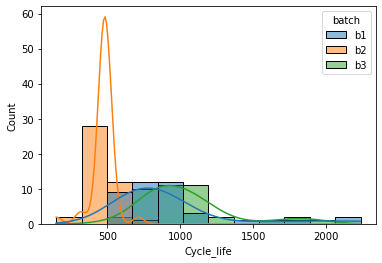

In [26]:
sns.histplot(data=Final, x=Final["Cycle_life"], hue=Final_Feature["batch"],kde =True)

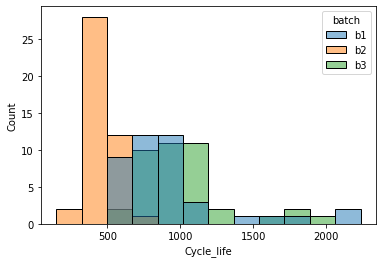

In [27]:
sns.histplot(data=Final, x=Final["Cycle_life"], hue=Final["batch"])

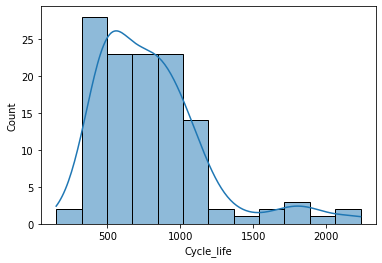

In [30]:
sns.histplot(data=Final, x=Final["Cycle_life"], kde=True)

In [31]:
Final_1 = Final.drop(['cell_no','Variance(Qdlin)','Minimum(Qdlin)','batch'],axis =1)

#### Heat Map to check the correlation of all different variables

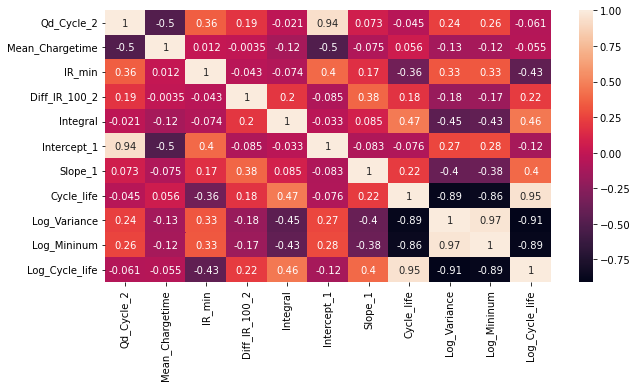

<Figure size 432x288 with 0 Axes>

In [32]:
Final_2 = Final_1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Final_2, annot=True)
plt.show()
plt.savefig("Heatmap_Discharge_Model.jpg")

In [33]:
Final_2

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2  \
Qd_Cycle_2         1.000000        -0.498747  0.356969       0.191249   
Mean_Chargetime   -0.498747         1.000000  0.011818      -0.003476   
IR_min             0.356969         0.011818  1.000000      -0.043227   
Diff_IR_100_2      0.191249        -0.003476 -0.043227       1.000000   
Integral          -0.020686        -0.122431 -0.073756       0.198859   
Intercept_1        0.937561        -0.501548  0.397065      -0.084589   
Slope_1            0.073033        -0.075015  0.168017       0.383690   
Cycle_life        -0.044585         0.056186 -0.357034       0.182071   
Log_Variance       0.238316        -0.133718  0.327635      -0.180350   
Log_Mininum        0.258440        -0.123697  0.333726      -0.167861   
Log_Cycle_life    -0.061342        -0.055474 -0.432549       0.219917   

                 Integral  Intercept_1   Slope_1  Cycle_life  Log_Variance  \
Qd_Cycle_2      -0.020686     0.937561  0.073033   -0.044585      0.238316   
Mean_Chargetime -0.122431    -0.501548 -0.075015    0.056186     -0.133718   
IR_min          -0.073756     0.397065  0.168017   -0.357034      0.327635   
Diff_IR_100_2    0.198859    -0.084589  0.383690    0.182071     -0.180350   
Integral         1.000000    -0.032821  0.085245    0.470067     -0.452285   
Intercept_1     -0.032821     1.000000 -0.082758   -0.076459      0.266291   
Slope_1          0.085245    -0.082758  1.000000    0.223332     -0.397246   
Cycle_life       0.470067    -0.076459  0.223332    1.000000     -0.885704   
Log_Variance    -0.452285     0.266291 -0.397246   -0.885704      1.000000   
Log_Mininum     -0.425054     0.281330 -0.384695   -0.861669      0.966739   
Log_Cycle_life   0.456697    -0.120818  0.400499    0.949903     -0.909736   

                 Log_Mininum  Log_Cycle_life  
Qd_Cycle_2          0.258440       -0.061342  
Mean_Chargetime    -0.123697       -0.055474  
IR_min              0.333726       -0.432549  
Diff_IR_100_2      -0.167861        0.219917  
Integral           -0.425054        0.456697  
Intercept_1         0.281330       -0.120818  
Slope_1            -0.384695        0.400499  
Cycle_life         -0.861669        0.949903  
Log_Variance        0.966739       -0.909736  
Log_Mininum         1.000000       -0.885928  
Log_Cycle_life     -0.885928        1.000000

#### Distribution curve of Cycle life with mean and median

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


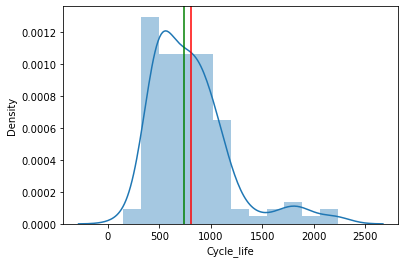

In [34]:
sns.distplot(Final_1['Cycle_life'])
plt.axvline(Final_1['Cycle_life'].mean(),color = 'r')
plt.axvline(Final_1['Cycle_life'].median(),color = 'g')

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


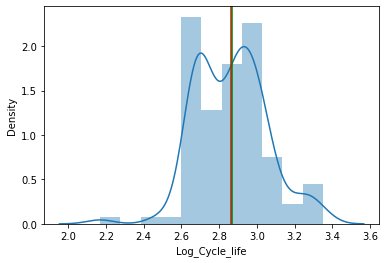

In [35]:
sns.distplot(Final_1['Log_Cycle_life'])
plt.axvline(Final_1['Log_Cycle_life'].mean(),color = 'r')
plt.axvline(Final_1['Log_Cycle_life'].median(),color = 'g')

#### Outlier Detection of Cycle life

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


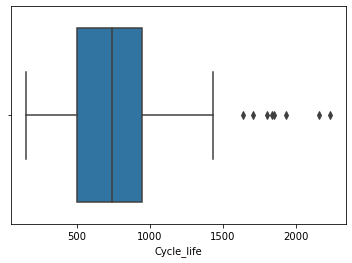

In [36]:
sns.boxplot(Final_1['Cycle_life'])

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


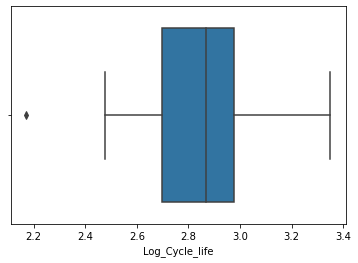

In [37]:
sns.boxplot(Final_1['Log_Cycle_life'])

In [38]:
#OutLier Selection:
Q1 = np.percentile(Final_1['Cycle_life'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(Final_1['Cycle_life'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

percentile25 = Final_1['Cycle_life'].quantile(0.25)
percentile75 = Final_1['Cycle_life'].quantile(0.75)
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
Final_1[Final_1['Cycle_life'] > upper_limit]
#Final_1[Final_1['Cycle_life']< lower_limit]

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
0      1.070689        10.048048  0.016444      -0.000075  41876.171150   
1      1.075301        10.048352  0.016764      -0.000042  41484.509937   
2      1.079922        10.027161  0.016613      -0.000014  41694.991899   
4      1.078417         9.048335  0.016369      -0.000053  37527.249169   
90     1.067522        11.042339  0.015373      -0.000035  35848.157395   
99     1.061009        11.048227  0.015253      -0.000121  38191.517361   
118    1.070147        10.045049  0.015743      -0.000116  34548.724970   
123    1.069549        11.038082  0.015557      -0.000080  35763.592302   

     Intercept_1       Slope_1  Cycle_life  Log_Variance  Log_Mininum  \
0       1.091144 -2.068070e-04      1852.0     -5.051526    -2.050261   
1       1.080965  5.535293e-06      2160.0     -5.135776    -2.045150   
2       1.084846  1.029563e-05      2237.0     -4.951883    -1.986994   
4       1.081875  1.899432e-05      1709.0     -4.604779    -1.837397   
90      1.070298 -2.357448e-06      1836.0     -4.487422    -1.766025   
99      1.064003 -9.691301e-06      1638.0     -4.684958    -1.858544   
118     1.072431 -8.787589e-06      1935.0     -4.336641    -1.684615   
123     1.071472 -1.258454e-07      1801.0     -4.505414    -1.771168   

     Log_Cycle_life  
0          3.267641  
1          3.334454  
2          3.349666  
4          3.232742  
90         3.263873  
99         3.214314  
118        3.286681  
123        3.255514

In [39]:
#OutLier Selection:
Q1 = np.percentile(Final_1['Log_Cycle_life'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(Final_1['Log_Cycle_life'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

percentile25 = Final_1['Log_Cycle_life'].quantile(0.25)
percentile75 = Final_1['Log_Cycle_life'].quantile(0.75)
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
#Final_1[Final_1['Log_Cycle_life'] > upper_limit]
Final_1[Final_1['Log_Cycle_life']< lower_limit]

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
42     1.07207        10.333632  0.016267      -0.000833  34419.725552   

    Intercept_1   Slope_1  Cycle_life  Log_Variance  Log_Mininum  \
42     1.084408 -0.001092       148.0     -2.734602    -0.862056   

    Log_Cycle_life  
42        2.170262

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


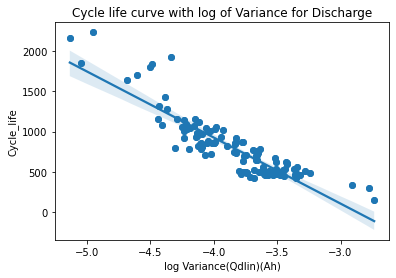

In [40]:
plt.scatter((Final_1['Log_Variance']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Log_Variance']),Final_1['Cycle_life'])
plt.xlabel('log Variance(Qdlin)(Ah)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with log of Variance for Discharge')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


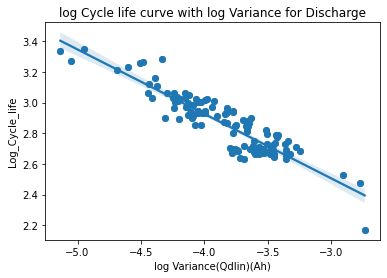

In [41]:
plt.scatter((Final_1['Log_Variance']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Log_Variance']),Final_1['Log_Cycle_life'])
plt.xlabel('log Variance(Qdlin)(Ah)')
plt.ylabel('Log_Cycle_life')
plt.title('log Cycle life curve with log Variance for Discharge')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


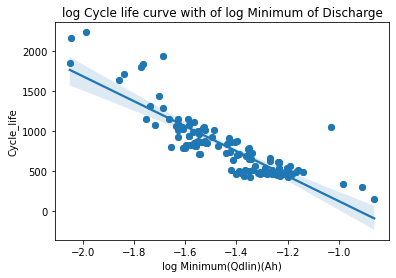

In [42]:
plt.scatter((Final_1['Log_Mininum']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Log_Mininum']),Final_1['Cycle_life'])
plt.xlabel('log Minimum(Qdlin)(Ah)')
plt.ylabel('Cycle_life')
plt.title('log Cycle life curve with of log Minimum of Discharge')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


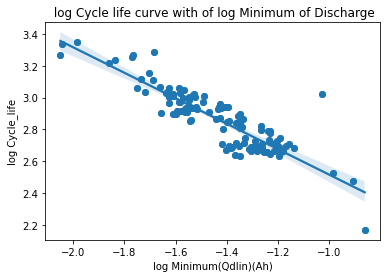

In [43]:
plt.scatter((Final_1['Log_Mininum']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Log_Mininum']),Final_1['Log_Cycle_life'])
plt.xlabel('log Minimum(Qdlin)(Ah)')
plt.ylabel('log Cycle_life')
plt.title(' log Cycle life curve with of log Minimum of Discharge')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


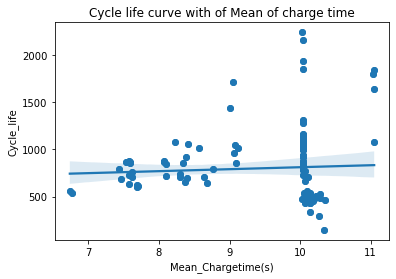

In [46]:
plt.scatter((Final_1['Mean_Chargetime']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Mean_Chargetime']),Final_1['Cycle_life'])
plt.xlabel('Mean_Chargetime(s)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with of Mean of charge time')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


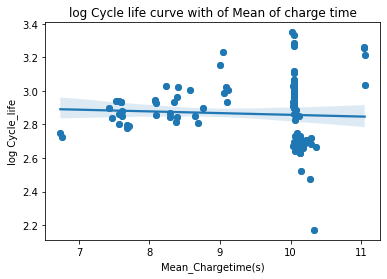

In [47]:
plt.scatter((Final_1['Mean_Chargetime']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Mean_Chargetime']),Final_1['Log_Cycle_life'])
plt.xlabel('Mean_Chargetime(s)')
plt.ylabel('log Cycle_life')
plt.title('log Cycle life curve with of Mean of charge time')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


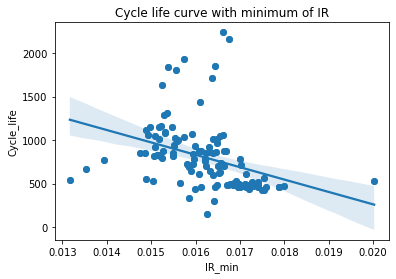

In [48]:
plt.scatter((Final_1['IR_min']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['IR_min']),Final_1['Cycle_life'])
plt.xlabel('IR_min')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with minimum of IR')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


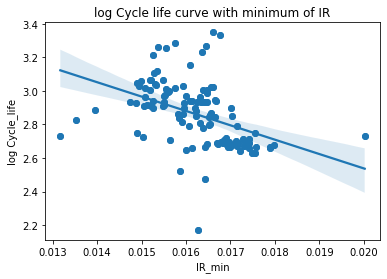

In [49]:
plt.scatter((Final_1['IR_min']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['IR_min']),Final_1['Log_Cycle_life'])
plt.xlabel('IR_min')
plt.ylabel('log Cycle_life')
plt.title('log Cycle life curve with minimum of IR')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


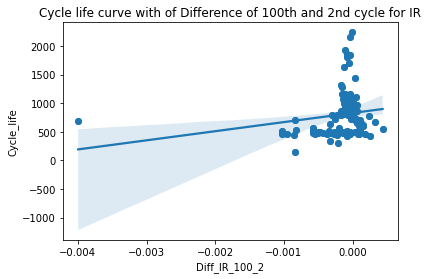

In [51]:
plt.scatter((Final_1['Diff_IR_100_2']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Diff_IR_100_2']),Final_1['Cycle_life'])
plt.xlabel('Diff_IR_100_2')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with of Difference of 100th and 2nd cycle for IR')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


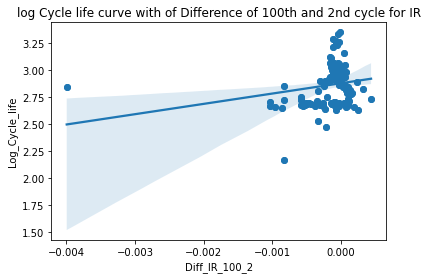

In [52]:
plt.scatter((Final_1['Diff_IR_100_2']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Diff_IR_100_2']),Final_1['Log_Cycle_life'])
plt.xlabel('Diff_IR_100_2')
plt.ylabel('Log_Cycle_life')
plt.title('log Cycle life curve with of Difference of 100th and 2nd cycle for IR')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


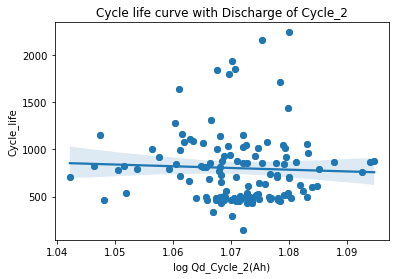

In [55]:
plt.scatter((Final_1['Qd_Cycle_2']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Qd_Cycle_2']),Final_1['Cycle_life'])
plt.xlabel('log Qd_Cycle_2(Ah)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Discharge of Cycle_2')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


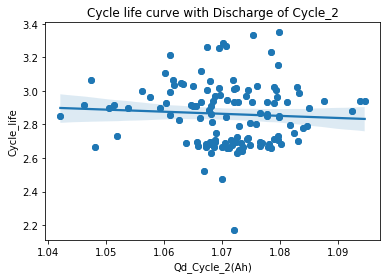

In [56]:
plt.scatter((Final_1['Qd_Cycle_2']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Qd_Cycle_2']),Final_1['Log_Cycle_life'])
plt.xlabel('Qd_Cycle_2(Ah)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Discharge of Cycle_2')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


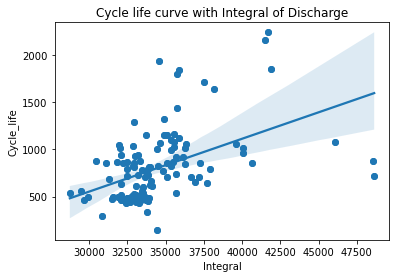

In [59]:
plt.scatter((Final_1['Integral']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Integral']),Final_1['Cycle_life'])
plt.xlabel('Integral')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Integral of Discharge')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


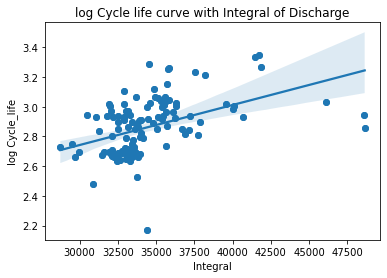

In [60]:
plt.scatter((Final_1['Integral']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Integral']),Final_1['Log_Cycle_life'])
plt.xlabel('Integral')
plt.ylabel('log Cycle_life')
plt.title('log Cycle life curve with Integral of Discharge')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


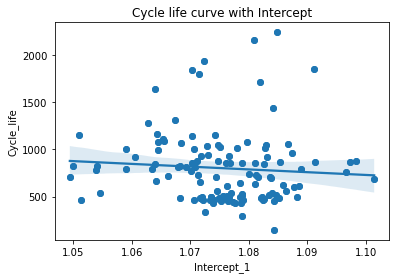

In [61]:
plt.scatter((Final_1['Intercept_1']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Intercept_1']),Final_1['Cycle_life'])
plt.xlabel('Intercept_1')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Intercept')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


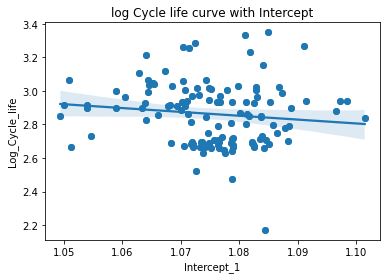

In [62]:
plt.scatter((Final_1['Intercept_1']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Intercept_1']),Final_1['Log_Cycle_life'])
plt.xlabel('Intercept_1')
plt.ylabel('Log_Cycle_life')
plt.title('log Cycle life curve with Intercept')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


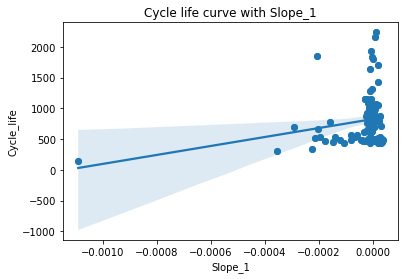

In [64]:
plt.scatter((Final_1['Slope_1']),Final_1['Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Slope_1']),Final_1['Cycle_life'])
plt.xlabel('Slope_1')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve with Slope')
plt.show()

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


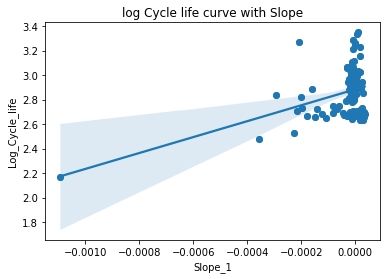

In [65]:
plt.scatter((Final_1['Slope_1']),Final_1['Log_Cycle_life'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((Final_1['Slope_1']),Final_1['Log_Cycle_life'])
plt.xlabel('Slope_1')
plt.ylabel('Log_Cycle_life')
plt.title('log Cycle life curve with Slope')
plt.show()

In [67]:
#Train,Test and Secondary Test Data Creation:
train = Final_1.iloc[train_ind, :]
test  = Final_1.iloc[test_ind,:]
Sec_test = Final_1.iloc[secondary_test_ind,:]

In [120]:
# train_ind_1 = pd.DataFrame(secondary_test_ind)
# train_ind_1.to_csv("C:/Users/satsin/Desktop/Battery life/secondary_test_ind.csv")

In [68]:
train.head()

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
1    1.075301        10.048352  0.016764      -0.000042  41484.509937   
3    1.079723         9.006261  0.016098       0.000039  35729.237342   
5    1.076127         8.230217  0.015923      -0.000112  46090.122378   
7    1.093864         7.527433  0.016083      -0.000038  31809.844240   
9    1.053779         8.759990  0.015963      -0.000304  37893.500809   

   Intercept_1   Slope_1  Cycle_life  Log_Variance  Log_Mininum  \
1     1.080965  0.000006      2160.0     -5.135776    -2.045150   
3     1.084075  0.000017      1434.0     -4.386348    -1.703321   
5     1.079755  0.000011      1074.0     -4.155832    -1.583636   
7     1.097254 -0.000006       870.0     -3.821834    -1.428857   
9     1.058972  0.000022       788.0     -4.099072    -1.598897   

   Log_Cycle_life  
1        3.334454  
3        3.156549  
5        3.031004  
7        2.939519  
9        2.896526

In [69]:
test.head()

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
0    1.070689        10.048048  0.016444      -0.000075  41876.171150   
2    1.079922        10.027161  0.016613      -0.000014  41694.991899   
4    1.078417         9.048335  0.016369      -0.000053  37527.249169   
6    1.075836         7.570377  0.016542      -0.000333  32094.376025   
8    1.082974         8.406008  0.016611      -0.000034  36328.258164   

   Intercept_1   Slope_1  Cycle_life  Log_Variance  Log_Mininum  \
0     1.091144 -0.000207      1852.0     -5.051526    -2.050261   
2     1.084846  0.000010      2237.0     -4.951883    -1.986994   
4     1.081875  0.000019      1709.0     -4.604779    -1.837397   
6     1.081157 -0.000005       636.0     -3.771283    -1.414229   
8     1.086771  0.000018      1054.0     -3.978645    -1.528095   

   Log_Cycle_life  
0        3.267641  
2        3.349666  
4        3.232742  
6        2.803457  
8        3.022841

In [70]:
Sec_test.head()

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
84    1.067455        10.045418  0.015180      -0.000128  32008.716426   
85    1.065060        10.041214  0.014932      -0.000103  34626.694601   
86    1.062889        10.042139  0.014885       0.000056  35871.163610   
87    1.072477        10.045241  0.015085      -0.000067  31940.891235   
88    1.051451        10.042577  0.015131      -0.000167  35352.438914   

    Intercept_1   Slope_1  Cycle_life  Log_Variance  Log_Mininum  \
84     1.070659 -0.000005      1009.0     -4.232673    -1.627170   
85     1.068472 -0.000015      1063.0     -4.248605    -1.637314   
86     1.065298 -0.000013      1115.0     -4.119551    -1.566176   
87     1.074805 -0.000005      1048.0     -4.191087    -1.610409   
88     1.053974 -0.000016       828.0     -4.096563    -1.580007   

    Log_Cycle_life  
84        3.003891  
85        3.026533  
86        3.047275  
87        3.020361  
88        2.918030

In [72]:
#Linear Regression Model:
X_train =train.drop(['Cycle_life','Log_Cycle_life'],axis =1)
y_train =train['Log_Cycle_life'].values.reshape(-1,1)
y_train_1 = train['Cycle_life'].values.reshape(-1,1)
X_test = test.drop(['Cycle_life','Log_Cycle_life'],axis =1)
y_test =test['Log_Cycle_life'].values.reshape(-1,1)
y_test_1 = test['Cycle_life'].values.reshape(-1,1)
X_test_sec=Sec_test.drop(['Cycle_life','Log_Cycle_life'],axis =1)
y_test_sec=Sec_test['Log_Cycle_life'].values.reshape(-1,1)
y_test_sec_1=Sec_test['Cycle_life'].values.reshape(-1,1)

In [73]:
X_train.head()

Qd_Cycle_2  Mean_Chargetime    IR_min  Diff_IR_100_2      Integral  \
1    1.075301        10.048352  0.016764      -0.000042  41484.509937   
3    1.079723         9.006261  0.016098       0.000039  35729.237342   
5    1.076127         8.230217  0.015923      -0.000112  46090.122378   
7    1.093864         7.527433  0.016083      -0.000038  31809.844240   
9    1.053779         8.759990  0.015963      -0.000304  37893.500809   

   Intercept_1   Slope_1  Log_Variance  Log_Mininum  
1     1.080965  0.000006     -5.135776    -2.045150  
3     1.084075  0.000017     -4.386348    -1.703321  
5     1.079755  0.000011     -4.155832    -1.583636  
7     1.097254 -0.000006     -3.821834    -1.428857  
9     1.058972  0.000022     -4.099072    -1.598897

#### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)
y_pred_sec = linreg.predict(X_test_sec)
y_pred_train_1 =10**y_pred_train
y_pred_1 = 10**y_pred
y_pred_sec_1 = 10**y_pred_sec

In [75]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    from sklearn.metrics import r2_score
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    R2_Score = r2_score(y_test,y_pred)
    x.extend([MSE,MAE,RMSE,MAPE,R2_Score])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE','R2_SCORE']
    return(df1)

#### Results based on all features 

In [76]:
#Linear Regression
Matrix(y_train,y_pred_train)

MSE       MAE      RMSE      MAPE  R2_SCORE
0  0.001967  0.036843  0.044349  1.329247  0.924659

In [77]:
Matrix(y_test,y_pred)

MSE       MAE      RMSE      MAPE  R2_SCORE
0  0.031221  0.080206  0.176694  2.971491  0.212322

In [78]:
Matrix(y_test_sec,y_pred_sec)

MSE       MAE      RMSE      MAPE  R2_SCORE
0  0.005236  0.051707  0.072363  1.681398   0.60435

In [80]:
Matrix(y_train_1,y_pred_train_1)

MSE        MAE       RMSE      MAPE  R2_SCORE
0  5158.471881  55.605529  71.822503  8.529624  0.950595

In [81]:
Matrix(y_test_1,y_pred_1)

MSE       MAE        RMSE       MAPE  R2_SCORE
0  31593.061584  95.00957  177.744371  18.764346  0.793534

In [84]:
Matrix(y_test_sec_1,y_pred_sec_1)

MSE         MAE       RMSE       MAPE  R2_SCORE
0  45406.214434  132.541436  213.08734  10.692977  0.510984

In [120]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0008571634693049132,l1_ratio= 0.5)
#model = ElasticNet(alpha=0.21136697216093944, l1_ratio= 0.5)
model.fit(X_train,y_train)
y_pred_elastic_train = model.predict(X_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)
y_pred_elastic_train_1 =10**y_pred_elastic_train
y_pred_elastic_1 = 10**y_pred_elastic
y_pred_elastic_sec_1 = 10**y_pred_elastic_sec

In [121]:
y_pred_elastic_train_2 = []
for l in y_pred_elastic_train_1:
    y_pred_elastic_train_2.append([l])

In [122]:
Matrix(y_train_1,y_pred_elastic_train_2)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  14184.194513  79.546671  119.097416  11.228084  0.864152

In [123]:
y_pred_elastic_2 = []
for j in y_pred_elastic_1:
    y_pred_elastic_2.append([j])

In [124]:
Matrix(y_test_1,y_pred_elastic_2)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  22354.616962  87.869022  149.514605  11.709209  0.853909

In [125]:
y_pred_elastic_sec_2 = []
for k in y_pred_elastic_sec_1:
    y_pred_elastic_sec_2.append([k])

In [126]:
Matrix(y_test_sec_1,y_pred_elastic_sec_2)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  105440.728515  237.120522  324.716382  20.189561 -0.135577

#### Elastic Net

In [132]:
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test_sec = scaler.fit_transform(X_test_sec)
x = []
mape_train = []
rmse_train =[]
r2_square_train =[]
mape = []
rmse =[]
r2_square =[]
mape_sec = []
rmse_sec =[]
r2_square_sec =[]
#ratio = [0.1,0.3,0.5,0.7,1.0]
ratio = list(np.arange(0.001, 1, 0.01))
for i in ratio:
    clf = ElasticNetCV(l1_ratio=i)
    clf.fit(X_train,y_train)
    y_pred_elastic_train = clf.predict(X_train)
    y_pred_elastic =clf.predict(X_test)
    y_pred_elastic_sec =clf.predict(X_test_sec)
    
    #Train
    y_pred_elastic_train_1 = 10**y_pred_elastic_train
    y_pred_elastic_train_2 = []
    for l in y_pred_elastic_train_1:
        y_pred_elastic_train_2.append([l])
        
    MAPE_train=np.mean(np.abs((y_train_1 - y_pred_elastic_train_2)/y_train_1))*100
    RMSE_train= np.sqrt(metrics.mean_squared_error(y_train_1,y_pred_elastic_train_2))
    R2_Score_train = r2_score(y_train_1,y_pred_elastic_train_2)
    mape_train.append(MAPE_train)
    rmse_train.append(RMSE_train)
    r2_square_train.append(R2_Score_train)
    
    #Primary Test
    y_pred_elastic_1 = 10**y_pred_elastic
    y_pred_elastic_2 = []
    for j in y_pred_elastic_1:
        y_pred_elastic_2.append([j])
        
    MAPE=np.mean(np.abs((y_test_1 - y_pred_elastic_2)/y_test_1))*100
    RMSE= np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_elastic_2))
    R2_Score = r2_score(y_test_1,y_pred_elastic_2)
    mape.append(MAPE)
    rmse.append(RMSE)
    r2_square.append(R2_Score)
    
    #Secondary Test
    y_pred_elastic_sec_1 = 10**y_pred_elastic_sec
    y_pred_elastic_sec_2 = []
    for k in y_pred_elastic_sec_1:
        y_pred_elastic_sec_2.append([k])
        
    MAPE_sec=np.mean(np.abs((y_test_sec_1 - y_pred_elastic_sec_2)/y_test_sec_1))*100
    RMSE_sec= np.sqrt(metrics.mean_squared_error(y_test_sec_1,y_pred_elastic_sec_2))
    R2_Score_sec = r2_score(y_test_sec_1,y_pred_elastic_sec_2)
    mape_sec.append(MAPE_sec)
    rmse_sec.append(RMSE_sec)
    r2_square_sec.append(R2_Score_sec)
    x.append(clf.alpha_)

x_1 = x
mape_train_1 = mape_train
rmse_train_1 = rmse_train
r2_square_train_1 = r2_square_train
mape_1 = mape
rmse_1 = rmse
r2_square_1 = r2_square
mape_sec_1 = mape_sec
rmse_sec_1 = rmse_sec
r2_square_sec_1 = r2_square_sec
Results = pd.DataFrame(x_1,columns = ['Alpha'])
Results['l1_ratio']=ratio
Results['MAPE_Train']=mape_train_1
Results['RMSE_Train']=rmse_train_1
Results['R2_Square_Train']=r2_square_train_1
Results['MAPE_Test']=mape_1
Results['RMSE_Test']=rmse_1
Results['R2_Square_Test']=r2_square_1
Results['MAPE_Sec_Test']=mape_sec_1
Results['RMSE_Sec_Test']=rmse_sec_1
Results['R2_Square_Sec_Test']=r2_square_sec_1
Results.head(100)
#Results.to_csv("C:/Users/satsin/Desktop/Battery life/Discharge_Result_1.csv")

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Alpha  l1_ratio  MAPE_Train  RMSE_Train  R2_Square_Train  MAPE_Test  \
0   0.229010     0.001    9.355295  103.099569         0.898197  12.527593   
1   0.168870     0.011    9.319129   99.920885         0.904378  12.148901   
2   0.134445     0.021    9.300067   98.077625         0.907873  11.978648   
3   0.104715     0.031    9.249571   95.278433         0.913057  12.067684   
4   0.084896     0.041    9.216666   93.224712         0.916764  12.161432   
..       ...       ...         ...         ...              ...        ...   
95  0.003925     0.951    8.860228   80.747273         0.937554  15.001203   
96  0.003884     0.961    8.860051   80.734402         0.937574  15.003083   
97  0.003844     0.971    8.859882   80.722061         0.937593  15.004857   
98  0.003805     0.981    8.859616   80.704996         0.937620  15.007874   
99  0.003766     0.991    8.859463   80.693587         0.937637  15.009467   

     RMSE_Test  R2_Square_Test  MAPE_Sec_Test  RMSE_Sec_Test  \
0   129.356637        0.890646      47.030628     658.173295   
1   126.590689        0.895273      47.125885     658.206054   
2   125.030791        0.897838      47.182108     658.224292   
3   124.996040        0.897895      47.240586     658.248337   
4   125.449584        0.897152      47.286791     658.273357   
..         ...             ...            ...            ...   
95  152.522151        0.847973      46.993931     653.714064   
96  152.544108        0.847929      46.994214     653.713896   
97  152.565041        0.847887      46.994498     653.713819   
98  152.596786        0.847824      46.994657     653.712056   
99  152.615964        0.847785      46.994940     653.712131   

    R2_Square_Sec_Test  
0            -3.665396  
1            -3.665861  
2            -3.666119  
3            -3.666460  
4            -3.666815  
..                 ...  
95           -3.602393  
96           -3.602391  
97           -3.602389  
98           -3.602365  
99           -3.602366  

[100 rows x 11 columns]

In [116]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0008571634693049132,l1_ratio= 0.5)
#model = ElasticNet(alpha=0.21136697216093944, l1_ratio= 0.5)
model.fit(X_train,y_train)
y_pred_elastic_train = model.predict(X_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)

In [126]:
Matrix(y_train,y_pred_elastic_train)

MSE         MAE       RMSE       MAPE  R2_SCORE
0  19122.707946  115.685412  138.28488  45.215065  0.816854

In [127]:
Matrix(y_test,y_pred_elastic)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  44126.226757  148.12693  210.062435  56.040031  0.711628

In [128]:
Matrix(y_test_sec,y_pred_elastic_sec)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  43076.173202  137.785731  207.548002  27.179469  0.536078

#### Using all the feature and target variable as Log Cycle life

In [256]:
#Linear Regression Model:
X_train =train.drop(['Cycle_life','Log_Cycle_life'],axis =1)
y_train =train['Log_Cycle_life'].values.reshape(-1,1) #Target Variable
X_test = test.drop(['Cycle_life','Log_Cycle_life'],axis =1)
y_test =test['Log_Cycle_life'].values.reshape(-1,1)
y_test_1 =test['Cycle_life'].values.reshape(-1,1)
X_test_sec=Sec_test.drop(['Cycle_life','Log_Cycle_life'],axis =1)
y_test_sec=Sec_test['Log_Cycle_life'].values.reshape(-1,1)
y_test_sec_1=Sec_test['Cycle_life'].values.reshape(-1,1)

In [257]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)
y_pred_sec = linreg.predict(X_test_sec)

In [258]:
y_pred_train_1 =10**y_pred_train
y_pred_1 = 10**y_pred
y_pred_sec_1 = 10**y_pred_sec
y_train_1 = 10**y_train

In [259]:
#Linear Regression
Matrix(y_train_1,y_pred_train_1)

MSE        MAE      RMSE      MAPE  R2_SCORE
0  5586.909255  60.929768  74.74563  9.794236  0.946492

In [260]:
Matrix(y_test_1,y_pred_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  135640.255028  172.008125  368.293708  25.081702  0.113569

In [261]:
Matrix(y_test_sec_1,y_pred_sec_1)

MSE         MAE        RMSE      MAPE  R2_SCORE
0  27169.814854  126.191227  164.832687  11.73265  0.707386

In [271]:
#Elastic Net
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn.metrics import r2_score
x = []
mape = []
rmse =[]
r2_square =[]
mape_sec = []
rmse_sec =[]
r2_square_sec =[]
ratio = [0.1,0.3,0.5,0.7,1.0]
for i in ratio:
    clf = ElasticNetCV(l1_ratio=i)
    clf.fit(X_train,y_train)
    #y_pred_elastic_train = model.predict(X_train)
    y_pred_elastic =clf.predict(X_test)
    y_pred_elastic_sec =clf.predict(X_test_sec)
    y_pred_elastic_1 = 10**y_pred_elastic
    y_pred_elastic_2 = []
    for j in y_pred_elastic_1:
        y_pred_elastic_2.append([j])
    y_pred_elastic_sec_1 = 10**y_pred_elastic_sec
    y_pred_elastic_sec_2 = []
    for k in y_pred_elastic_sec_1:
        y_pred_elastic_sec_2.append([k])
    MAPE=np.mean(np.abs((y_test_1 - y_pred_elastic_2)/y_test_1))*100
    MAPE_sec=np.mean(np.abs((y_test_sec_1 - y_pred_elastic_sec_2)/y_test_sec_1))*100
    RMSE= np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_elastic_2))
    RMSE_sec= np.sqrt(metrics.mean_squared_error(y_test_sec_1,y_pred_elastic_sec_2))
    R2_Score = r2_score(y_test_1,y_pred_elastic_2)
    R2_Score_sec = r2_score(y_test_sec_1,y_pred_elastic_sec_2)
    mape.append(MAPE)
    x.append(clf.alpha_)
    rmse.append(RMSE)
    r2_square.append(R2_Score)
    mape_sec.append(MAPE_sec)
    rmse_sec.append(RMSE_sec)
    r2_square_sec.append(R2_Score_sec)
    #clf.coef_
print(x)
print(mape)
print(rmse)
print(r2_square)
print(mape_sec)
print(rmse_sec)
print(r2_square_sec)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

[0.0005193989111225891, 0.0001731329703741963, 0.00010387978222451784, 7.419984444608406e-05, 8.464908089030922e-05]
[16.46309987064764, 16.269953422875886, 16.667019156170994, 18.048960561360854, 14.77994981842398]
[134.72076835417434, 139.0999072966077, 157.10623016780445, 184.8030985015905, 147.83391457756605]
[0.8813888955638349, 0.8735525927432171, 0.8386967703630264, 0.7768099935460148, 0.857174944455888]
[11.905523424572403, 11.908633999150952, 12.409268367615827, 13.19814601360832, 14.599500334948756]
[214.84943329204683, 219.4462239881832, 224.84182599395288, 230.8128350598556, 244.21365741874658]
[0.5028625725315603, 0.48136208776348355, 0.4555446834963436, 0.42624306676401025, 0.35768519662882425]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.655334758447819e-05, tolerance: 8.55201443905079e-05
  model = cd_fast.enet_coordinate_descent_gram(


In [268]:
Matrix(y_test_1,y_pred_elastic_2)

MSE        MAE        RMSE      MAPE  R2_SCORE
0  21854.866299  97.145412  147.833915  14.77995  0.857175

In [272]:
Matrix(y_test_sec_1,y_pred_elastic_sec_2)

MSE         MAE        RMSE     MAPE  R2_SCORE
0  59640.31047  169.631935  244.213657  14.5995  0.357685

#### Removing 2 features from the train, test and sec test 

In [177]:
#Linear Regression Model:
X_train =train.drop(['Cycle_life','Log_Cycle_life','Qd_max-2','Log_Kurtosis'],axis =1)
y_train =train['Cycle_life'].values.reshape(-1,1) #Target Variable
y_train_1 = train['Cycle_life'].values.reshape(-1,1)
X_test = test.drop(['Cycle_life','Log_Cycle_life','Qd_max-2','Log_Kurtosis'],axis =1)
y_test =test['Cycle_life'].values.reshape(-1,1)
y_test_1 = test['Cycle_life'].values.reshape(-1,1)
X_test_sec=Sec_test.drop(['Cycle_life','Log_Cycle_life','Qd_max-2','Log_Kurtosis'],axis =1)
y_test_sec=Sec_test['Cycle_life'].values.reshape(-1,1)
y_test_sec_1=Sec_test['Cycle_life'].values.reshape(-1,1)

In [178]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)
y_pred_sec = linreg.predict(X_test_sec)

In [179]:
#Linear Regression
Matrix(y_train,y_pred_train)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  18236.572478  109.976568  135.042854  19.523342  0.825341

In [180]:
Matrix(y_test,y_pred)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  27529.457673  122.308382  165.920034  20.818992  0.820091

In [181]:
Matrix(y_test_sec,y_pred_sec)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  47768.479532  143.477793  218.560014  12.602005  0.485543

In [182]:
from sklearn.linear_model import ElasticNet
#model = ElasticNet(alpha=0.0008571634693049132,l1_ratio= 0.5)
model = ElasticNet(alpha=0.21136697216093944, l1_ratio= 0.5)
model.fit(X_train,y_train)
y_pred_elastic_train = model.predict(X_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)

In [183]:
Matrix(y_train,y_pred_elastic_train)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  34298.058779  130.107861  185.197351  38.272088  0.671514

In [147]:
Matrix(y_test,y_pred_elastic)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  50377.347975  149.789675  224.448987  48.417601  0.670776

In [148]:
Matrix(y_test_sec,y_pred_elastic_sec)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  73379.611206  170.05094  270.886713  21.201418  0.209716

#### Removing 2 features and using log of cycle life as target life

In [301]:
#Linear Regression Model:
X_train =train.drop(['Cycle_life','Log_Cycle_life','Qd_max-2','Log_Kurtosis'],axis =1)
y_train =train['Log_Cycle_life'].values.reshape(-1,1) #Target Variable
y_train_1 = train['Cycle_life'].values.reshape(-1,1)
X_test = test.drop(['Cycle_life','Log_Cycle_life','Qd_max-2','Log_Kurtosis'],axis =1)
y_test =test['Log_Cycle_life'].values.reshape(-1,1)
y_test_1 = test['Cycle_life'].values.reshape(-1,1)
X_test_sec=Sec_test.drop(['Cycle_life','Log_Cycle_life','Qd_max-2','Log_Kurtosis'],axis =1)
y_test_sec=Sec_test['Log_Cycle_life'].values.reshape(-1,1)
y_test_sec_1=Sec_test['Cycle_life'].values.reshape(-1,1)

In [302]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)
y_pred_sec = linreg.predict(X_test_sec)

In [303]:
y_pred_train_1 =10**y_pred_train
y_pred_1 = 10**y_pred
y_pred_sec_1 = 10**y_pred_sec
y_train_1 = 10**y_train

In [304]:
#Linear Regression
Matrix(y_train,y_pred_train)

MSE       MAE      RMSE      MAPE  R2_SCORE
0  0.00417  0.052211  0.064579  1.893058   0.84025

In [305]:
Matrix(y_test,y_pred)

MSE       MAE      RMSE      MAPE  R2_SCORE
0  0.017475  0.068486  0.132193  2.468638  0.559118

In [306]:
Matrix(y_test_sec,y_pred_sec)

MSE       MAE      RMSE      MAPE  R2_SCORE
0  0.010583  0.084916  0.102872  2.802343  0.200398

In [307]:
Matrix(y_train_1,y_pred_train_1)

MSE        MAE       RMSE       MAPE  R2_SCORE
0  8442.68896  74.868304  91.884106  12.244522  0.919141

In [308]:
Matrix(y_test_1,y_pred_1)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  25831.922219  93.162408  160.723123  14.164778  0.831184

In [309]:
Matrix(y_test_sec_1,y_pred_sec_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  69314.061649  194.243429  263.275638  17.063987  0.253501

In [195]:
from sklearn.linear_model import ElasticNet
#model = ElasticNet(alpha=0.0008571634693049132,l1_ratio= 0.5)
model = ElasticNet(alpha=0.21136697216093944, l1_ratio= 0.5)
model.fit(X_train,y_train)
y_pred_elastic_train = model.predict(X_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)

In [209]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

RANDOMSTATE = 42
np.random.seed(RANDOMSTATE)

kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)
elasticnetcv = make_pipeline(RobustScaler(),
                             ElasticNetCV(max_iter=100000, 
                                          l1_ratio=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                          alphas=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                          cv=kfolds,
                                          n_jobs=-1,
                                          verbose=1,
                                         ))

#train and get hyperparams
elasticnetcv.fit(X_train, y_train)
l1_ratio = elasticnetcv._final_estimator.l1_ratio_
alpha = elasticnetcv._final_estimator.alpha_
print('l1_ratio', l1_ratio)
print('alpha', alpha)

# evaluate using kfolds on full dataset
# I don't see API to get CV error from elasticnetcv, so we use cross_val_score
elasticnet = ElasticNet(alpha=alpha,
                        l1_ratio=l1_ratio,
                        max_iter=10000)
elasticnet.fit(X_train,y_train)
y_pred_elastic_train = model.predict(X_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)
# scores = -cross_val_score(elasticnet,X_train,y_train,
#                           scoring="neg_root_mean_squared_error",
#                           cv=kfolds,
#                           n_jobs=-1)
# #raw_scores = [cv_to_raw(x) for x in scores]
# print()
# print("Log1p CV RMSE %.04f (STD %.04f)" % (np.mean(scores), np.std(scores)))
# #print("Raw CV RMSE %.0f (STD %.0f)" % (np.mean(raw_scores), np.std(raw_scores)))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
......................................................................................

l1_ratio 0.99
alpha 0.01


..[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    1.2s finished


In [327]:
#Elastic Net
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import Rob
x = []
mape_train = []
rmse_train =[]
r2_square_train =[]
mape = []
rmse =[]
r2_square =[]
mape_sec = []
rmse_sec =[]
r2_square_sec =[]
ratio = [0.1,0.3,0.5,0.7,1.0]
#ratio = 
for i in ratio:
    clf = ElasticNetCV(l1_ratio=i)
    clf.fit(X_train,y_train)
    y_pred_elastic_train = clf.predict(X_train)
    y_pred_elastic =clf.predict(X_test)
    y_pred_elastic_sec =clf.predict(X_test_sec)
    #Train
    y_pred_elastic_train_1 = 10**y_pred_elastic_train
    y_pred_elastic_train_2 = []
    for l in y_pred_elastic_train_1:
        y_pred_elastic_train_2.append([l])
    MAPE_train=np.mean(np.abs((y_train_1 - y_pred_elastic_train_2)/y_train_1))*100
    RMSE_train= np.sqrt(metrics.mean_squared_error(y_train_1,y_pred_elastic_train_2))
    R2_Score_train = r2_score(y_train_1,y_pred_elastic_train_2)
    mape_train.append(MAPE_train)
    rmse_train.append(RMSE_train)
    r2_square_train.append(R2_Score_train)
    #Primary Test
    y_pred_elastic_1 = 10**y_pred_elastic
    y_pred_elastic_2 = []
    for j in y_pred_elastic_1:
        y_pred_elastic_2.append([j])
    MAPE=np.mean(np.abs((y_test_1 - y_pred_elastic_2)/y_test_1))*100
    RMSE= np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_elastic_2))
    R2_Score = r2_score(y_test_1,y_pred_elastic_2)
    mape.append(MAPE)
    rmse.append(RMSE)
    r2_square.append(R2_Score)
    #Secondary Test
    y_pred_elastic_sec_1 = 10**y_pred_elastic_sec
    y_pred_elastic_sec_2 = []
    for k in y_pred_elastic_sec_1:
        y_pred_elastic_sec_2.append([k])
    MAPE_sec=np.mean(np.abs((y_test_sec_1 - y_pred_elastic_sec_2)/y_test_sec_1))*100
    RMSE_sec= np.sqrt(metrics.mean_squared_error(y_test_sec_1,y_pred_elastic_sec_2))
    R2_Score_sec = r2_score(y_test_sec_1,y_pred_elastic_sec_2)
    mape_sec.append(MAPE_sec)
    rmse_sec.append(RMSE_sec)
    r2_square_sec.append(R2_Score_sec)
    x.append(clf.alpha_)

x_1 = x
mape_train_1 = mape_train
rmse_train_1 = rmse_train
r2_square_train_1 = r2_square_train
mape_1 = mape
rmse_1 = rmse
r2_square_1 = r2_square
mape_sec_1 = mape_sec
rmse_sec_1 = rmse_sec
r2_square_sec_1 = r2_square_sec
Results = pd.DataFrame(x_1,columns = ['Alpha'])
Results['l1_ratio']=ratio
Results['MAPE_Train']=mape_train_1
Results['RMSE_Train']=rmse_train_1
Results['R2_Square_Train']=r2_square_train_1
Results['MAPE_Test']=mape_1
Results['RMSE_Test']=rmse_1
Results['R2_Square_Test']=r2_square_1
Results['MAPE_Sec_Test']=mape_sec_1
Results['RMSE_Sec_Test']=rmse_sec_1
Results['R2_Square_Sec_Test']=r2_square_sec_1
Results.head(10)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Alpha  l1_ratio  MAPE_Train  RMSE_Train  R2_Square_Train  MAPE_Test  \
0  0.000519       0.1   15.528064  116.566685         0.869864  16.462303   
1  0.000173       0.3   14.674391  108.706571         0.886823  15.507724   
2  0.000104       0.5   13.896936  102.444587         0.899486  14.555798   
3  0.000074       0.7   13.204082   97.660117         0.908656  14.192328   
4  0.000085       1.0   12.651676   94.765815         0.913990  14.055596   

    RMSE_Test  R2_Square_Test  MAPE_Sec_Test  RMSE_Sec_Test  \
0  135.632707        0.879778      11.916695     215.050065   
1  132.372685        0.885487      12.037223     221.062853   
2  133.861094        0.882898      12.800019     229.453841   
3  138.063696        0.875429      13.886216     239.022464   
4  139.353648        0.873091      14.957388     248.666165   

   R2_Square_Sec_Test  
0            0.501934  
1            0.473692  
2            0.432980  
3            0.384702  
4            0.334050

In [316]:
from sklearn.linear_model import ElasticNet
#model = ElasticNet(alpha=0.0008571634693049132,l1_ratio= 0.5)
model = ElasticNet(alpha=0.21136697216093944, l1_ratio= 0.5)
model.fit(X_train,y_train)
y_pred_elastic_train = model.predict(X_train)
y_pred_elastic_1 = 10**y_pred_elastic_train
y_pred_elastic_2 = []
for j in y_pred_elastic_1:
    y_pred_elastic_2.append([j])

In [317]:
Matrix(y_train_1,y_pred_elastic_2)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  107064.715947  212.531709  327.207451  29.629703 -0.025401

In [326]:
y_pred_elastic_train

array([2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699,
       2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699,
       2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699,
       2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699,
       2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699,
       2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699,
       2.7939699, 2.7939699, 2.7939699, 2.7939699, 2.7939699])

In [288]:
Matrix(y_test_1,y_pred_elastic_2)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  19419.439167  92.382918  139.353648  14.055596  0.873091

In [290]:
Matrix(y_test_sec_1,y_pred_elastic_sec_2)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  61834.861719  173.812077  248.666165  14.957388   0.33405

In [246]:
from sklearn.linear_model import ElasticNetCV
x = []
mape = []
ratio = [0.1,0.3,0.5,0.7,1.0]
for i in ratio:
    clf = ElasticNetCV(l1_ratio=i)
    clf.fit(X_train,y_train)
    #y_pred_elastic_train = model.predict(X_train)
    y_pred_elastic =clf.predict(X_test)
    y_pred_elastic_sec =clf.predict(X_test_sec)
    y_pred_elastic_1 = 10**y_pred_elastic
    y_pred_elastic_train_2 = []
    for j in y_pred_elastic_1:
        y_pred_elastic_train_2.append([j])
    MAPE=np.mean(np.abs((y_test_1 - y_pred_elastic_train_2)/y_test_1))*100
    mape.append(MAPE)
    x.append(clf.alpha_)
#clf.coef_
print(x)
print(mape)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

[0.0005193989111225891, 0.0001731329703741963, 0.00010387978222451784, 7.419984444608406e-05, 8.464908089030922e-05]
[16.46230348957595, 15.507723744691676, 14.55579785760629, 14.192328397254814, 14.05559614378509]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [210]:
y_pred_elastic_train_1 =10**y_pred_elastic_train
y_pred_elastic_1 = 10**y_pred_elastic
y_pred_elastic_sec_1 = 10**y_pred_elastic_sec

In [211]:
y_pred_elastic_train_2 = []
for i in y_pred_elastic_train_1:
    y_pred_elastic_train_2.append([i])

In [212]:
Matrix(y_train_1,y_pred_elastic_train_2)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  107064.715947  212.531709  327.207451  29.629703 -0.025401

In [245]:
y_pred_elastic_1

array([2068.83604622, 2016.65174919, 1525.74634473,  714.63635431,
        938.6390498 ,  852.12963771,  943.43444421,  574.13612501,
        476.49078201,  877.5544144 ,  845.07740147,  761.81449918,
        744.41578775,  817.94908203,  733.83853113,  643.26008858,
        625.52787088,  577.944326  ,  383.00400277,  578.27609925,
        554.04927414,  267.29476181,  309.57752458,  520.54867575,
        566.52720498,  460.42491688,  551.08842885,  595.34948136,
        535.31801203,  557.03540686,  438.53551085,  556.77597216,
        674.65033435,  604.06218683,  637.10511351,  637.02659706,
        598.58632062,  542.02252174,  560.21155485,  491.81033878,
        470.34115207,  457.52110287,  634.5233363 ])

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


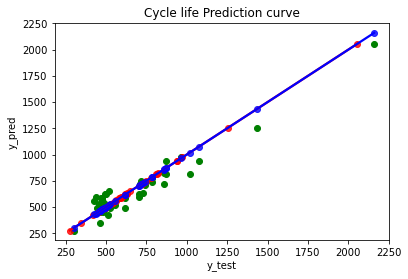

<Figure size 432x288 with 0 Axes>

In [158]:
plt.scatter(y_train_1,y_pred_train_1,color='g')
#plt.scatter(y_pred_sec,X_test_sec,color='g')
sns.regplot(y_pred_train_1,y_pred_train_1,color='r')
sns.regplot(y_train_1,y_train_1,color='b')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Cycle life Prediction curve')
plt.show()
plt.savefig("y_test_pred.jpg")

C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\satsin\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


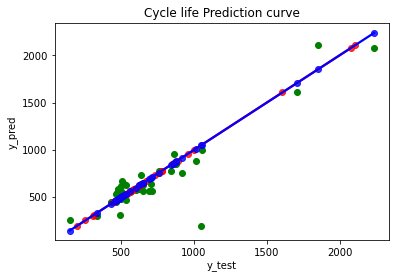

<Figure size 432x288 with 0 Axes>

In [159]:
plt.scatter(y_test_1,y_pred_1,color='g')
#plt.scatter(y_pred_sec,X_test_sec,color='g')
sns.regplot(y_pred_1,y_pred_1,color='r')
sns.regplot(y_test_1,y_test_1,color='b')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Cycle life Prediction curve')
plt.show()
plt.savefig("y_test_pred.jpg")

### K fold cross Validation for hyperparameter tunning

In [66]:
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [78]:
std_slc = StandardScaler()
pca = decomposition.PCA()
elasticnet = linear_model.ElasticNet()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('elasticnet', elasticnet)])
n_components = list(range(1,X_train.shape[1]+1,1))
normalize = [True, False]
selection = ['cyclic', 'random']
parameters = dict(pca__n_components=n_components,
                      elasticnet__normalize=normalize,
                      elasticnet__selection=selection)
clf_EN = GridSearchCV(pipe, parameters)
clf_EN.fit(X_train,y_train)
y_pred = clf_EN.predict(X_test)
print('Best Number Of Components:', clf_EN.best_estimator_.get_params()['pca__n_components'])
print(clf_EN.best_estimator_.get_params()['elasticnet'])

Best Number Of Components: 1
ElasticNet(normalize=True)


In [79]:
y_pred_elastic = 10**y_pred

In [80]:
y_pred_elastic_1 = []
for i in y_pred_elastic:
    y_pred_elastic_1.append([i])

In [81]:
Matrix(y_test_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  160591.247743  244.459801  400.738378  34.997955  -0.04949

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import ElasticNet
# Standardize data before
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# define grid
params = dict()

# values for alpha: 100 values between e^-5 and e^5
params['alpha'] =  np.logspace(-5, 5, 100, endpoint=True)

# values for l1_ratio: 100 values between 0 and 1
params['l1_ratio'] = np.arange(0, 1, 0.01)

regressor = ElasticNet()

# Call the RanddomizedSearch with Cross Validation using the chosen regressor

rs_cv= RandomizedSearchCV(regressor, params, n_iter = 100, scoring=None, cv=5, verbose=0, refit=True)
rs_cv.fit(X_train, y_train.values.ravel())

# Results
Y_pred = rs_cv.predict(X_test)
#score = rs_cv.score(X_test,y_test,)
r2_score = metrics.r2_score(y_test,Y_pred)
RMSE_score = np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
print(r2_score, RMSE_score, rs_cv.best_params_ )

In [95]:
from sklearn.linear_model import ElasticNetCV
alpha = [1.0]
clf = ElasticNetCV(alphas=alpha)
clf.fit(X_train,y_train)
clf.l1_ratio

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5

In [87]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.0008571634693049132,l1_ratio= 0.5)
#model = ElasticNet(alpha=0.3, l1_ratio= 0.99)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)

In [88]:
y_pred_elastic_1 = 10**y_pred_elastic

In [89]:
y_pred_elastic_2 = []
for i in y_pred_elastic_1:
    y_pred_elastic_2.append([i])

In [90]:
Matrix(y_test_1,y_pred_elastic_2)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  18529.380361  89.817755  136.122667  13.883075  0.878908

In [417]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint, expon
from sklearn.model_selection import GroupKFold, KFold

'''Hyper-param for Random Forest'''
no_of_DT_estimators =500 # feature selection is using 700

rf = RandomForestRegressor(n_estimators=no_of_DT_estimators, bootstrap=True, n_jobs=-1)

# make sure the max_feature in RF param does not exceed no. of input features
if len(list(X_train)) < 7:
    max_no_of_fet = len(list(X_train))
else:
    max_no_of_fet = 7

param = {
         "max_depth": sp_randint(10, 25),
         "max_features": sp_randint(3, max_no_of_fet),
         "min_samples_split": sp_randint(3, 9),
         "min_samples_leaf": sp_randint(5, 15),
         "criterion": ['squared_error']} # ['mse', 'friedman_mse', 'mae']

groups = data_train.Group
no_of_splits = len(np.unique(groups))  # number of slits is equal to the number of groups
group_kfold = GroupKFold(n_splits=10)
model = RandomizedSearchCV(rf, param_distributions=param, cv=group_kfold, n_iter=20,refit=True, verbose=2)
# fit model
model.fit(X_train, y_train,)
y_pred = model.predict(X_test)
y_pred_sec = model.predict(X_test_sec)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.9s
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.8s
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.7s
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.8s
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.7s
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.7s
[CV] END criterion=squared_error, max_depth=14, max_features=4, min_samples_leaf=13, min_samples_split=5; total time=   0.7s
[CV] END criterion=squared_error, max_depth=14, max_features=4

[CV] END criterion=squared_error, max_depth=15, max_features=5, min_samples_leaf=11, min_samples_split=3; total time=   0.7s
[CV] END criterion=squared_error, max_depth=15, max_features=5, min_samples_leaf=11, min_samples_split=3; total time=   0.6s
[CV] END criterion=squared_error, max_depth=15, max_features=5, min_samples_leaf=11, min_samples_split=3; total time=   0.7s
[CV] END criterion=squared_error, max_depth=15, max_features=5, min_samples_leaf=11, min_samples_split=3; total time=   0.7s
[CV] END criterion=squared_error, max_depth=18, max_features=4, min_samples_leaf=6, min_samples_split=5; total time=   0.7s
[CV] END criterion=squared_error, max_depth=18, max_features=4, min_samples_leaf=6, min_samples_split=5; total time=   1.0s
[CV] END criterion=squared_error, max_depth=18, max_features=4, min_samples_leaf=6, min_samples_split=5; total time=   0.8s
[CV] END criterion=squared_error, max_depth=18, max_features=4, min_samples_leaf=6, min_samples_split=5; total time=   0.7s
[CV]

[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.7s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.8s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.7s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.7s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.7s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.7s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.8s
[CV] END criterion=squared_error, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8; total time=   0.7s
[CV] END

[CV] END criterion=squared_error, max_depth=16, max_features=5, min_samples_leaf=6, min_samples_split=4; total time=   0.9s
[CV] END criterion=squared_error, max_depth=16, max_features=5, min_samples_leaf=6, min_samples_split=4; total time=   1.0s


In [418]:
Matrix(y_test,y_pred)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  77618.286542  157.441968  278.600586  22.647254  0.492752

In [419]:
Matrix(y_test_sec,y_pred_sec)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  85692.613014  196.058464  292.733006  17.134214  0.077107

In [420]:
# if len(list(X_train)) < 7:
#     max_no_of_fet = len(list(X_train))
# else:
#     max_no_of_fet = 7
len(list(X_train))

6

In [289]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()
 

# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X_train, y_train, model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
#plot_best_fit(X_train, y_train, model)

Mean MAE: 40109.909 (10742.424)


In [290]:
Matrix(y_test,y_pred)
#rmse = np.sqrt(-results_1.best_score_)
#print('MSME: %.3f' % score)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  53235.398576  157.752777  230.727975  23.912019  0.652098

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
# Standardize data before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
y_pred_sec = linreg.predict(X_test_sec)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [238]:
linreg.intercept_

673.7560975609756

In [239]:
linreg.coef_

array([  60.07133973,  -62.2226359 ,  214.85746689, -529.20313331,
        -11.18542594,  -75.28534913])

In [240]:
y_pred

array([-12150.61484132,   1760.38025629,   1461.95881159,    765.76335312,
         1044.13812825,    891.27073822,    999.36599039, -55278.16497489,
          548.16886376,   1006.97916754,    952.24054624,    875.8430434 ,
          819.52257504,    922.67911932,    811.91989366,    683.83678318,
          642.70469669,    550.8084773 ,  -1516.04780569,    586.28745918,
          511.55548829,    364.36668883,    191.98074616,    445.1833959 ,
          603.49362162, -12216.95789853,    531.42153413,    775.64692884,
          709.49668914,    457.25072128,   -597.15269165,    596.71259013,
          765.72276869,    604.08653687,    631.69901535,    695.20416933,
          533.33408798,    489.87796784,    532.66275329,    308.25572643,
       -13986.05902894,    295.63464514,    711.46479937])

In [225]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    from sklearn.metrics import r2_score
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    R2_Score = r2_score(y_test,y_pred)
    x.extend([MSE,MAE,RMSE,MAPE,R2_Score])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE','R2_SCORE']
    return(df1)

In [226]:
Matrix(y_test,y_pred)

MSE          MAE        RMSE        MAPE    R2_SCORE
0  8.619585e+07  2431.775909  9284.17221  371.418282 -562.303724

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


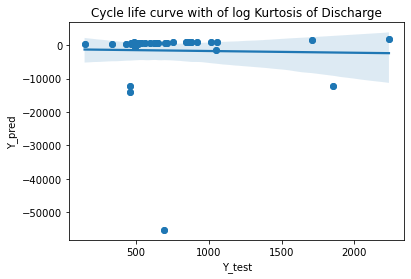

In [227]:
plt.scatter(y_test,y_pred)
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('Cycle life curve with of log Kurtosis of Discharge')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


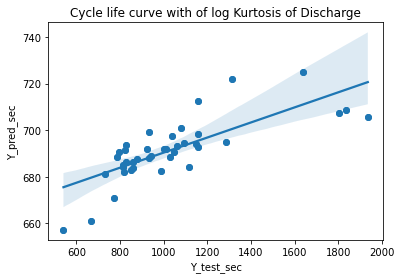

In [228]:
plt.scatter(y_test_sec,y_pred_sec)
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot(y_test_sec,y_pred_sec)
plt.xlabel('Y_test_sec')
plt.ylabel('Y_pred_sec')
plt.title('Cycle life curve with of log Kurtosis of Discharge')
plt.show()

In [229]:
Matrix(y_test_sec,y_pred_sec)

MSE        MAE        RMSE       MAPE  R2_SCORE
0  202983.100316  346.36698  450.536458  29.465092 -1.186089

In [243]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
# Standardize data before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = ElasticNet(alpha=0.3,l1_ratio= 0.99)
#model = ElasticNet(alpha=0.3, l1_ratio= 0.99)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [262]:
X_train[:,2]

array([-3.93989535, -1.91658514, -1.29423813, -0.39250966, -1.14099566,
       -0.94146952, -0.86601138,  0.11360714,  0.90214686, -0.67125714,
       -0.26878298, -0.41259692, -0.19401334,  0.07809476, -0.44993301,
        0.05478204,  0.65841898, -1.1183728 ,  0.01660039,  0.68608631,
        2.43525681, -0.10384672,  0.61781395,  1.07207868,  0.19462883,
        1.1694534 ,  0.58628004,  0.86355486,  0.87098541,  0.5935835 ,
        0.2134135 , -0.2863594 ,  0.09381352, -0.18376099,  0.17386431,
        0.53040487,  0.44484912,  0.6054202 , -0.02220677,  0.955816  ,
        0.27188142])

<AxesSubplot:ylabel='Count'>

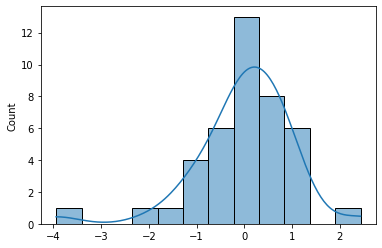

In [263]:
sns.histplot(data=X_train,x=X_train[:,2], kde=True)

In [244]:
Matrix(y_test,y_pred_elastic)

MSE          MAE         RMSE        MAPE    R2_SCORE
0  6.552260e+07  2115.070582  8094.603292  323.479295 -427.200713

In [245]:
Matrix(y_test_sec,y_pred_elastic_sec)

MSE         MAE       RMSE       MAPE  R2_SCORE
0  141602.773778  346.945199  376.30144  38.019898 -0.525035

### Train and Test are combined as Train data and Secondary Test Data is used as Test data

In [294]:
Train_Test = Final.iloc[train_ind, :]
Train_Test=Final.iloc[test_ind,:]
sec_test = Final.iloc[secondary_test_ind,:]

In [300]:
Train_test = Final.drop(secondary_test_ind,axis =0)

In [301]:
Train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Qd_Cycle_2    84 non-null     float64
 1   Qd_max-2      84 non-null     float64
 2   Cycle_life    84 non-null     float64
 3   Log_Variance  84 non-null     float64
 4   Log_Mininum   84 non-null     float64
 5   Log_Skewness  84 non-null     float64
 6   Log_Kurtosis  84 non-null     float64
dtypes: float64(7)
memory usage: 5.2 KB


In [302]:
test = Final.iloc[secondary_test_ind,:]

In [385]:
X_train =Train_test.drop('Cycle_life',axis =1)
y_train =Train_test['Cycle_life'] #Target Variable
X_test_sec=test.drop('Cycle_life',axis =1)
y_test_sec=test['Cycle_life']

In [373]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test_sec)
y_pred_train = linreg.predict(X_train)

In [366]:
y_pred

array([1059.30066564, 1064.22005176,  972.67731372, 1097.82158357,
        790.95238277,  508.15449971, 1278.9937913 ,  930.95835351,
        827.04180058, 1156.8592116 ,  777.00661236,  789.23848173,
        934.58519522,  918.79544008,  853.17740124, 1380.98055627,
       1208.03663967, 1085.89355755, 1031.59734348,  942.72332453,
        703.63267656,  780.80717719,  788.95122114,  945.68739324,
       1107.04003591,  919.30582587,  321.71099977,  913.32940846,
       1019.45162559,  706.58323095, 1143.72081853, 1056.23798267,
       1028.10969518,  987.43104995, 1136.35490598, 1077.69359361,
       1080.67942383,  906.01373519,  997.65699603, 1311.69460318])

In [367]:
linreg.coef_

array([8877.0224055 ,   83.50623788, -815.32020444,   25.28629904,
         57.34815201, -331.27017019])

In [368]:
linreg.intercept_

-11760.312241049869

In [374]:
Matrix(y_train,y_pred_train)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  18763.684245  106.392113  136.980598  19.048515  0.855229

In [369]:
Matrix(y_test_sec,y_pred)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  43113.991971  138.830931  207.639091  12.535823  0.535671

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#Standardize data before
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test_sec)
linreg =LinearRegression()
linreg.fit(X_train,y_train)
y_pred_1 = linreg.predict(X_test_sec)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [346]:
Matrix(y_test_sec,y_pred_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  732648.395577  817.591305  855.948828  90.774152 -6.890484

In [347]:
linreg.coef_

array([ 7.95869444e+01,  2.11700839e-01, -2.75287944e+02,  4.55535630e+00,
        3.15405772e+01, -1.27211293e+01])

In [348]:
linreg.intercept_

651.905021534844

In [349]:
y_pred_1

array([1870.72409787, 1879.76506212, 1852.83624782, 1870.48992076,
       1829.07633547, 1689.22174365, 1947.52423155, 1837.3905466 ,
       1781.2090952 , 1921.41682267, 1773.30273957, 1744.83220743,
       1834.92239409, 1811.07519499, 1799.42043607, 1988.68741016,
       1904.69852492, 1874.16115823, 1843.26977245, 1840.34183351,
       1738.95299201, 1807.42756624, 1846.92162669, 1850.70540085,
       1872.21473181, 1845.04337495, 1660.14791952, 1827.52135331,
       1854.38590034, 1749.50577714, 1918.45789982, 1885.3939899 ,
       1872.93671463, 1873.62517977, 1883.00980983, 1933.55654721,
       1899.65748396, 1867.56934194, 1845.48057386, 1952.79184311])

In [107]:
#Elastic Net Regression:
from sklearn.linear_model import ElasticNet
#model = ElasticNet(alpha=0.010000, l1_ratio= 0.760000)
model = ElasticNet(alpha=0.4, l1_ratio= 0.99)
#model = ElasticNet(alpha=0.000010, l1_ratio= 0.550000)
model.fit(X_train,y_train)
y_pred_elastic =model.predict(X_test)
y_pred_elastic_sec =model.predict(X_test_sec)

In [108]:
y_pred_elastic_1 = 10**y_pred_elastic
y_pred_elastic_sec_1 = 10**y_pred_elastic_sec

In [109]:
Matrix(y_test_1,y_pred_elastic_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  160591.247743  244.459801  400.738378  34.997955  -0.04949

In [110]:
Matrix(y_test_sec_1,y_pred_elastic_sec_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  260741.350654  413.805705  510.628388  36.053894 -1.808135

In [362]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#Standardize data before
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test_sec)
#model = ElasticNet(alpha=0.010000, l1_ratio= 0.760000)
model = ElasticNet(alpha=0.3, l1_ratio= 0.99)
model.fit(X_train,y_train)
y_pred_elastic_1 =model.predict(X_test_sec)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [363]:
Matrix(y_test_sec,y_pred_elastic)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  44745.968137  150.411083  211.532428  14.235692  0.518094

In [387]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()
 

# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X_train, y_train, model)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
#plot_best_fit(X_train, y_train, model)

Mean MAE: 43198.027 (16736.405)


In [377]:
#HuberRegressor:
Matrix(y_test_sec,y_pred)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  43788.178812  135.449979  209.256252  12.055422   0.52841

In [388]:
Matrix(y_train,y_pred_train)

MSE         MAE      RMSE       MAPE  R2_SCORE
0  22195.368225  116.647579  148.9811  19.534947  0.828752

In [379]:
#RANSAC Regressor:
Matrix(y_test_sec,y_pred)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  72184.049703  184.580298  268.670895  15.589526  0.222592

In [381]:
#TheilSen Regressor
Matrix(y_test_sec,y_pred)

MSE         MAE        RMSE      MAPE  R2_SCORE
0  60663.836141  165.029225  246.300297  14.35753  0.346662

### Modeling without using log of  Minimum of Discharge value

In [75]:
X_train_1 =train.drop(['Cycle_life','Log_Mininum'],axis =1)
y_train_1 =train['Cycle_life'] #Target Variable
X_test_1 = test.drop(['Cycle_life','Log_Mininum'],axis =1)
y_test_1 =test['Cycle_life']
X_test_sec_1=Sec_test.drop(['Cycle_life','Log_Mininum'],axis =1)
y_test_sec_1=Sec_test['Cycle_life']

In [77]:
X_train_1.head()

Qd_Cycle_2  Qd_max-2  Log_Variance  Log_Skewness  Log_Kurtosis
1    1.075301  0.009288     -5.135776     -0.499000      0.016426
3    1.079723  0.006530     -4.386348     -0.322093      0.050851
5    1.076127  0.005944     -4.155832     -0.849869      0.076409
7    1.093864  0.004104     -3.821834     -0.510463      0.046264
9    1.053779  0.009460     -4.099072     -0.217875      0.073224

In [78]:
y_train_1.head()

1    2160.0
3    1434.0
5    1074.0
7     870.0
9     788.0
Name: Cycle_life, dtype: float64

In [89]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(X_train_1,y_train_1)
y_pred_1 = linreg.predict(X_test_1)
y_pred_sec_1 = linreg.predict(X_test_sec_1)

In [90]:
linreg.coef_

array([ 6.67359952e+03, -2.30486562e+04, -8.20385147e+02,  4.64369132e-01,
       -1.49490060e+03])

In [91]:
linreg.intercept_

-9261.666641128695

In [92]:
y_pred_1

array([ -8706.14003069,   1716.17085208,   1376.56742785,    742.70020142,
          970.7857576 ,    878.81567916,   1008.39826506, -41252.17429925,
          528.53166007,   1000.80831707,    939.8277328 ,    858.88417095,
          816.49778657,    910.13272842,    800.71236526,    681.448062  ,
          645.80883996,    571.46217331,    201.93652689,    616.57919871,
          516.31689034,    382.31477485,    166.32071694,    526.05544854,
          597.68957313,  -8988.82621773,    541.14520616,    772.40048359,
          947.41081634,    581.77405919,    246.64853634,    633.96862121,
          755.02814022,    625.72801235,    632.89151498,    716.45317932,
          511.91638693,    498.16532442,    534.39446145,    547.8486887 ,
       -10347.68234062,    326.75568196,    750.60687259])

In [93]:
Matrix(y_test_1,y_pred_1)

MSE         MAE         RMSE        MAPE    R2_SCORE
0  4.833695e+07  1815.69728  6952.477667  278.821902 -314.889691

In [94]:
Matrix(y_test_sec_1,y_pred_sec_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  38891.771444  142.629315  197.209968  13.548339  0.581143

In [161]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.010000, l1_ratio= 0.760000)
#model = ElasticNet(alpha=0.044560, l1_ratio= 0.9)
model.fit(X_train_1,y_train_1)
y_pred_elastic_1 =model.predict(X_test_1)
y_pred_elastic_sec_1 =model.predict(X_test_sec_1)

In [162]:
Matrix(y_test_1,y_pred_elastic_1)

MSE         MAE        RMSE       MAPE  R2_SCORE
0  29081.916984  128.267535  170.534211  19.585726  0.809945

In [163]:
Matrix(y_test_sec_1,y_pred_elastic_sec_1)

MSE         MAE        RMSE      MAPE  R2_SCORE
0  44310.597683  139.634829  210.500826  12.76934  0.522783

#### K Fold Cross Validation for hyperparameter tunning

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0,10,100]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1,normalize=True)
# fit model
model.fit(X_train,y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Standardize data before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Standardize data before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define grid
params = dict()

# values for alpha: 100 values between e^-5 and e^5
params['alpha'] =  np.logspace(-5, 5, 100, endpoint=True)

# values for l1_ratio: 100 values between 0 and 1
params['l1_ratio'] = np.arange(0, 1, 0.01)

regressor = ElasticNet()

# Call the RanddomizedSearch with Cross Validation using the chosen regressor

rs_cv= RandomizedSearchCV(regressor, params, n_iter = 100, scoring=None, cv=5, verbose=0, refit=True)
rs_cv.fit(X_train, y_train.values.ravel())

# Results
Y_pred = rs_cv.predict(X_test)
#score = rs_cv.score(X_test,y_test,)
r2_score = metrics.r2_score(y_test,Y_pred)
RMSE_score = np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
print(r2_score, RMSE_score, rs_cv.best_params_ )

NameError: name 'ElasticNet' is not defined

In [117]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0.0,1.0,10,100]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X_train,y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1948924.505130318, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to 

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315326.86492571846, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164060.7307157584, tolerance: 195.17672432432434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215214.10920754028, tolerance: 419.6811027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Py

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301483.0825383744, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might 

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275397.2071191555, tolerance: 409.55097297297294
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159462.77523752535, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214052.5973477362, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306751.1624299645, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244173.03300574044, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253125.38753136247, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286462.3208359271, tolerance: 410.4819891891891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179517.09084512581, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282074.2422911876, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219380.97479273108, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256009.92664690086, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314628.9756704124, tolerance: 420.5494972972974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: 

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195153.20601275345, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285095.80200726626, tolerance: 408.57987027027036
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56458.567140802974, tolerance: 352.1601081081081
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277333.3652128227, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235940.21037568897, tolerance: 410.4819891891891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245317.3711534962, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216046.05126612028, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78435.54890440026, tolerance: 420.6710432432432
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111764.48948909159, tolerance: 406.26367567567564
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261986.94467348373, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262970.5882397513, tolerance: 406.26367567567564
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\P

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292017.5343959739, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291468.8951023373, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304720.74869087903, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257253.68729078496, tolerance: 405.4225081081082
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290722.87989888346, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4923.703944124165, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259482.25101045752, tolerance: 420.5494972972974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214965.03096716246, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255106.06757471198, tolerance: 405.4225081081082
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139987.09761804016, tolerance: 408.57987027027036
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289062.49723699555, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180499.67379002128, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151298.06867044212, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245316.5391674079, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233497.405266542, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219743.7941302536, tolerance: 409.55097297297294
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324284.4598618879, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pytho

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216044.887929318, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292684.67584075197, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245316.27427380392, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326875.0905745451, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299645.7251526138, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259495.0664130235, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3373.22547857085, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183791.6859085807, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249732.39032706013, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255188.31566031417, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232342.4603081639, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328509.30480187805, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233931.50352411182, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250692.84992589615, tolerance: 406.26367567567564
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74160.19394522937, tolerance: 195.17672432432434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261122.17621042952, tolerance: 420.6710432432432
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280845.4823967486, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290299.1769824699, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206820.1381655184, tolerance: 405.4225081081082
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243074.7128137269, tolerance: 405.4225081081082
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228454.63249701745, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283661.83884047205, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199842.4952723652, tolerance: 195.24810810810814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259493.4238397698, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281226.7711011149, tolerance: 408.57987027027036
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250622.07711557933, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216090.4580426095, tolerance: 363.1906702702703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Py

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289239.33620755456, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278646.10583141417, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243907.1325724715, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283791.19953511434, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227448.0679279538, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226588.7320693881, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261120.32566463528, tolerance: 420.6710432432432
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270525.64551259286, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296393.97003642196, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233402.55175904557, tolerance: 352.1601081081081
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260151.99885327372, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\P

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270244.5988023434, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150169.64249867882, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168965.91558944623, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220174.64240293409, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291849.88413220784, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227446.3850697917, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259403.23510024557, tolerance: 420.5494972972974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.5375404288061, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyth

alpha: 0.000010
l1_ratio_: 0.550000


C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228369.96324948347, tolerance: 400.0817297297297
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255646.37728994247, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

In [120]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0,10,100]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1,normalize=True)
# fit model
model.fit(X_train,y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037381.1367967748, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to 

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255647.73272724915, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51073.45264589772, tolerance: 195.17672432432434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.3800234430237, tolerance: 420.6710432432432
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250741.59376923196, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211739.64078028267, tolerance: 405.4225081081082
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169624.2923429661, tolerance: 195.24810810810814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257114.5439856779, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255837.80188707495, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7535.602846467111, tolerance: 195.24810810810814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264569.607270775, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169170.83684464113, tolerance: 195.24810810810814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226652.47309292102, tolerance: 413.5078810810811
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257959.77820293736, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224433.39647778994, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Py

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.3571169676143, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219743.18123047845, tolerance: 409.55097297297294
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217565.72584377686, tolerance: 363.1906702702703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216088.8116374677, tolerance: 363.1906702702703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168276.06604048487, tolerance: 195.24810810810814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259491.33602326084, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226292.14596518915, tolerance: 413.5078810810811
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224067.14541891543, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223994.1363162104, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44716.53140802041, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165286.01978493924, tolerance: 195.17672432432434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You migh

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259793.38675218032, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261946.27513860445, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263738.2085435964, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255647.1039542528, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262046.71668094822, tolerance: 420.6710432432432
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216040.0953346854, tolerance: 407.6679027027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyth

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425.78080044913804, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160891.8082361739, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175245.9045012066, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223551.78470545664, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109602.02942688845, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657.4825333267218, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228634.71215561245, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259306.8542590107, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255646.9202448018, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244849.43636904992, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253224.85146412463, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228423.40252625538, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255050.7788758882, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216088.73499440402, tolerance: 363.1906702702703
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 712.6073343017488, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214621.5900746603, tolerance: 419.6811027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250434.1726030442, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126797.5602149894, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208103.04098671846, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136662.90266501374, tolerance: 408.57987027027036
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You migh

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218789.245457025, tolerance: 406.26367567567564
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214944.43888336, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Con

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225655.7681453228, tolerance: 413.5078810810811
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256298.87490700066, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179508.4149337706, tolerance: 410.4819891891891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159460.91807112377, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166777.20074725524, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Py

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62856.55844435748, tolerance: 195.24810810810814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113185.66368224451, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85897.78658593519, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Py

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232838.69565551222, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214756.74427867914, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256144.08047261048, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyth

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252323.0238580269, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184244.97526777847, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199375.28651223186, tolerance: 419.1139675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206652.73048308698, tolerance: 422.68069729729734
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258091.05871104865, tolerance: 415.2583027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\P

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189654.04127595632, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155235.80025141194, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253348.31119179673, tolerance: 359.45756388888884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253117.3322233511, tolerance: 412.3652108108108
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259699.83105684034, tolerance: 420.5494972972974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246980.6478307679, tolerance: 400.7439243243243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyth

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223094.6516041588, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234887.63857168186, tolerance: 418.5469675675676
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154737.71336196805, tolerance: 400.0817297297297
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Py

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227446.10588394664, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196364.1979724951, tolerance: 406.26367567567564
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217501.28251112613, tolerance: 406.26367567567564
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\P

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226568.2350813308, tolerance: 411.4851027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235932.67334930878, tolerance: 410.4819891891891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233944.53651420912, tolerance: 422.68069729729734
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249350.42669922332, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206697.94424711057, tolerance: 416.41102702702705
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\P

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218828.07330862212, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213654.1465380644, tolerance: 397.56758918918916
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213110.2598701969, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to i

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223094.6289868015, tolerance: 390.39745555555555
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184682.02648021065, tolerance: 400.0817297297297
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255140.24659308745, tolerance: 416.451427027027
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211510.0996446563, tolerance: 408.57987027027036
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210101.31907412494, tolerance: 419.6811027027028
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164060.5964514811, tolerance: 195.17672432432434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226876.90433835017, tolerance: 410.25030810810813
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235932.60426682234, tolerance: 410.4819891891891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159460.89118630555, tolerance: 196.05372972972972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201113.32627301716, tolerance: 411.4743
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Pyt

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28723.993727924128, tolerance: 422.68069729729734
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224437.82163318354, tolerance: 422.68069729729734
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_desc

alpha: 0.010000
l1_ratio_: 0.760000


C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187201.29087340843, tolerance: 413.5078810810811
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199723.1287138381, tolerance: 413.5078810810811
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent

In [119]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Use grid search to tune the parameters:

parametersGrid = {"max_iter": [10,50,100],
                  "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10,)
grid.fit(X_train, y_train)
Y_pred = grid.predict(X_test)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+05, tolerance: 1.039e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+05, tolerance: 4.218e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.273e+05, tolerance: 4.075e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e+05, tolerance: 1.039e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.204e+05, tolerance: 4.126e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.368e+05, tolerance: 4.127e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.293e+05, tolerance: 4.218e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.304e+05, tolerance: 4.073e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.186e+05, tolerance: 4.051e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.971e+05, tolerance: 4.089e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.921e+05, tolerance: 4.075e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+05, tolerance: 1.039e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.891e+05, tolerance: 4.218e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e+05, tolerance: 4.073e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.851e+05, tolerance: 4.051e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.795e+05, tolerance: 4.089e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.157e+05, tolerance: 4.126e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.838e+05, tolerance: 4.127e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.681e+05, tolerance: 4.269e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.484e+05, tolerance: 4.051e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.464e+05, tolerance: 4.126e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.665e+05, tolerance: 4.127e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.354e+05, tolerance: 4.269e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.281e+05, tolerance: 4.051e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.848e+05, tolerance: 4.075e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.074e+05, tolerance: 1.039e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+05, tolerance: 4.051e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.390e+05, tolerance: 4.089e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.710e+05, tolerance: 4.218e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.811e+05, tolerance: 4.073e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.811e+05, tolerance: 4.127e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.788e+05, tolerance: 4.075e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+06, tolerance: 4.073e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+06, tolerance: 4.269e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.175e+05, tolerance: 1.039e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e+06, tolerance: 4.218e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.194e+05, tolerance: 1.039e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+06, tolerance: 4.218e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of th

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Standardize data before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define grid
params = dict()

# values for alpha: 100 values between e^-5 and e^5
params['alpha'] =  np.logspace(-5, 5, 100, endpoint=True)

# values for l1_ratio: 100 values between 0 and 1
params['l1_ratio'] = np.arange(0, 1, 0.01)

regressor = ElasticNet()

# Call the RanddomizedSearch with Cross Validation using the chosen regressor

rs_cv= RandomizedSearchCV(regressor, params, n_iter = 100, scoring=None, cv=5, verbose=0, refit=True)
rs_cv.fit(X_train, y_train.values.ravel())

# Results
Y_pred = rs_cv.predict(X_test)
#score = rs_cv.score(X_test,y_test,)
r2_score = metrics.r2_score(y_test,Y_pred)
RMSE_score = np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
print(r2_score, RMSE_score, rs_cv.best_params_ )

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.481e+04, tolerance: 9.034e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.274e+05, tolerance: 4.054e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+05, tolerance: 3.878e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+04, tolerance: 9.034e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.930e+04, tolerance: 9.034e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.255e+05, tolerance: 4.054e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.200e+05, tolerance: 4.054e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+05, tolerance: 3.852e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.230e+05, tolerance: 3.924e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.061e+05, tolerance: 3.878e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

-141.36117731539323 4667.320899543846 {'l1_ratio': 0.0, 'alpha': 0.1747528400007683}


C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.278e+05, tolerance: 4.054e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.819e+05, tolerance: 3.852e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

In [141]:
optimizer = ElasticNetCV(l1_ratio = [.1,.5,.7,.9,.99,1], n_alphas=400, cv=5, normalize=True)
optimizer.fit(X_train, y_train)
best = ElasticNet(alpha=optimizer.alphas, l1_ratio=optimizer.l1_ratio_, normalize=True)
best.fit(X_train, y_train)
print('alpha: %f' % best.alpha_)
print('l1_ratio_: %f' % best.l1_ratio_)

C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\satsin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objecti

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [211]:
import csv
y= {}
x1 = []
z = {}
#Feature = pd.DataFrame()
m = 1
for i in list(df):
    x = []
    df1 = pd.DataFrame(df[i])
    df2 = df1.transpose()
    df3 = pd.DataFrame.from_dict({(j,k): df2['cycles'][j][k] 
                       for j in df2['cycles'].keys() 
                       for k in df2['cycles'][i].keys()},
                   orient='index')
    Qdlin = df3['Qdlin'][99]-df3['Qdlin'][9]
    Qdlin1 = pd.DataFrame(Qdlin)
    Cycle = pd.DataFrame(df2['cycle_life'])
    #z =pd.DataFrame(df2.index)
    y.update({'Variance(Qdlin)':np.var(Qdlin1)[0],'Minimum(Qdlin)':np.min(Qdlin1)[0]})
    #print(y)
    z.update({'Skewness(Qdlin)':skew(Qdlin1),'Kurtosis(Qdlin)':kurtosis(Qdlin1)})
    if m ==1:
        Feature = pd.DataFrame(y.keys())
        x.append(Feature)
        Feature = pd.DataFrame(z.keys())
        x.append(Feature)
    else:
        Feature = pd.DataFrame(y.values())
        x.append(Feature)
        Feature = pd.DataFrame(z.values())
        x.append(Feature)
    #print(Feature)
    x1.insert(m,x)
    m= m+1
print(Feature)
# Feature_1 = pd.DataFrame(x1)

KeyError: 1

In [206]:
Feature_1

0  \
0                     0
0  Variance(Qdlin)
1   Mini...   
1                            0
0  0.000010
1 -0.011004   
2                            0
0  0.000018
1 -0.017216   
3                            0
0  0.000036
1 -0.018961   
4                            0
0  0.000023
1 -0.013958   
..                                                 ...   
119                          0
0  0.000035
1 -0.017458   
120                          0
0  0.000051
1 -0.022054   
121                          0
0  0.000060
1 -0.024193   
122                          0
0  0.000074
1 -0.025985   
123                          0
0  0.000030
1 -0.016478   

                                                     1  
0                     0
0  Skewness(Qdlin)
1  Kurto...  
1                            0
0 -0.429375
1 -1.029116  
2                            0
0 -1.080194
1  0.348637  
3                            0
0 -0.439050
1 -1.095416  
4                            0
0 -0.362548
1 -1.333831  
..                                                 ...  
119                          0
0 -0.292539
1 -1.003013  
120                          0
0 -0.315431
1 -1.138513  
121                          0
0 -0.357134
1 -1.063130  
122                          0
0 -0.244616
1 -1.238396  
123                          0
0 -0.328143
1 -1.177129  

[124 rows x 2 columns]

In [133]:
#y['Cycle']
#pd.DataFrame(df2['cycle_life']).to_dict().values() 
df2

cycle_life                charge_policy  \
b3c45  [[1801.0]]  4.8C(80%)-4.8C-newstructure   

                                                 summary  \
b3c45  {'IR': [0.015778109, 0.015742011, 0.015711647,...   

                                                  cycles  
b3c45  {'0': {'I': [0.5633510272727271, 0.82326021818...

In [140]:
#Feature creation from Cycle data
#Minimum,Variance,Skewness and kurtosis are the feature which needs to be created from cycle data for all the cycles


for i in list(df):
    df1 = pd.DataFrame(df[i])
    df2 = df1.transpose()
    df3 = pd.DataFrame.from_dict({(j,k): df2['cycles'][j][k] 
                       for j in df2['cycles'].keys() 
                       for k in df2['cycles'][i].keys()},
                   orient='index')
    Qdlin = df3['Qdlin'][99]-df3['Qdlin'][9]
    Qdlin1 = pd.DataFrame(Qdlin)
    Cycle = pd.DataFrame(df2['cycle_life'])
    def dict(Qdlin1):
        my_dict ={}
        my_dict('Variance(Qdlin)') = np.var(Qdlin1)
        my_dict('Minimum(Qdlin)')  = np.min(Qdlin1)
        my_dict('Skewness(Qdlin)') = skew(Qdlin1)
        my_dict('Kurtosis(Qdlin)') = kurtosis(Qdlin1)
        return my_dict
        #x.extend([Cycle,Variance(Qdlin),Minimum(Qdlin),Skewness(Qdlin),Kurtosis(Qdlin)])
Feature = pd.DataFrame(dict(Qdlin1))
        #Feature_1 = Feature.transpose()
        #Feature_1.columns = ['Cycle','Variance(Qdlin)','Minimum(Qdlin)','Skewness(Qdlin)','Kurtosis(Qdlin)']
        #print(Feature_1.head())
Feature.head()  

#Feature['Cycle'] = Cycle['cycle_life'][0][0][0]
#Feature['Cell'] = df2.index

SyntaxError: cannot assign to function call (Temp/ipykernel_9496/2339141548.py, line 17)

In [ ]:
#Feature creation from Cycle data
#Minimum,Variance,Skewness and kurtosis are the feature which needs to be created from cycle data for all the cycles
def feature(df):
    y= {}
    #x=[]
    for i in list(df):
        df1 = pd.DataFrame(df[i])
        df2 = df1.transpose()
        df3 = pd.DataFrame.from_dict({(j,k): df2['cycles'][j][k] 
                           for j in df2['cycles'].keys() 
                           for k in df2['cycles'][i].keys()},
                       orient='index')
        Qdlin = df3['Qdlin'][99]-df3['Qdlin'][9]
        Qdlin1 = pd.DataFrame(Qdlin)
        Cycle = pd.DataFrame(df2['cycle_life'])
        z =pd.DataFrame(df2.index)
        #print(z)
        y.update({'Variance(Qdlin)':np.var(Qdlin1),'Minimum(Qdlin)':np.min(Qdlin1),'Skewness(Qdlin)':skew(Qdlin1),'Kurtosis(Qdlin)':kurtosis(Qdlin1)})
        #print(y)
        x =  y.items()
        z = list(x)
            
        #x.append(y)
        Feature = pd.DataFrame(z)
        Feature_1 = Feature.transpose()
        #print(x)
    #print(x)
   # for j in range(len(Cycle)):
        
       
        #Feature['Cycle'] = Cycle['cycle_life'][j][0][0]
        #Feature['Cell'] = z
            
#         Feature = pd.DataFrame.from_dict(l)
#         Feature['Cycle'] = Cycle['cycle_life'][0][0][0]
#         Feature['Cell'] = df2.index
            #Variance(Qdlin) = np.var(Qdlin1)
        #Minimum(Qdlin)  = np.min(Qdlin1)
        #Skewness(Qdlin) = skew(Qdlin1)
        #Kurtosis(Qdlin) = kurtosis(Qdlin1)
        #x.extend([Cycle,Variance(Qdlin),Minimum(Qdlin),Skewness(Qdlin),Kurtosis(Qdlin)])
        #Feature = pd.DataFrame(x)
       # df1 = df.transpose()
        #Feature.columns = ['Cycle','Variance(Qdlin)','Minimum(Qdlin)','Skewness(Qdlin)','Kurtosis(Qdlin)']
        #print(Feature.head())
        return(Feature_1)

#Feature['Cycle'] = Cycle['cycle_life'][0][0][0]
#Feature['Cell'] = df2.index

In [65]:
z = pd.DataFrame(y)
z['Cycle'] = Cycle['cycle_life'][0][0][0]
z['index'] = df2.index

In [73]:
newdf = z.set_index('index')

In [74]:
newdf

Variance(Qdlin)  Minimum(Qdlin)  Skewness(Qdlin)  Kurtosis(Qdlin)  \
index                                                                      
b3c45          0.00003       -0.016478        -0.328143        -1.177129   

        Cycle  
index          
b3c45  1801.0

In [ ]:

#Extract the last value of Qdlin for each cycle of every cell:
df1 = df.transpose()
df2 = pd.DataFrame(df1['cycles'][cell_no])
df3 = df2.transpose()
qdlin= pd.DataFrame(df3['Qdlin'])
qdlin_1 = qdlin.transpose()
qdlin_2 = []
for col in qdlin_1:
    qdlin_2.append(qdlin_1[col][0][-1])
    qdlin_final = pd.DataFrame(qdlin_2,columns = ['Qdlin'])

In [43]:
for i in list(df):
    cell = pd.DataFrame(df[i])
    cell_1 = cell.transpose()
    df3 = pd.DataFrame(cell_1['summary'][i])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IR          1800 non-null   float64
 1   QC          1800 non-null   float64
 2   QD          1800 non-null   float64
 3   Tavg        1800 non-null   float64
 4   Tmin        1800 non-null   float64
 5   Tmax        1800 non-null   float64
 6   chargetime  1800 non-null   float64
 7   cycle       1800 non-null   float64
dtypes: float64(8)
memory usage: 112.6 KB
